## $\textbf{Distribution Sampling}$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from astroquery.gaia import Gaia
import seaborn as sn

### $\textbf{Importing all Herbig Ae/Be Stars from Vioque M. catalog}$

In [2]:
all_herbig = pd.read_csv("all_herbig star.csv")

### $\textbf{Keeping only required columns from all\_herbig list }$

In [3]:
herbig_star = all_herbig[["Name", "RAICRS", "DEICRS", "Dist", "E_Dist", "e_Dist"]]
herbig_star = herbig_star.sort_values(by='Dist')
herbig_star = herbig_star.reset_index(drop=True)

In [4]:
herbig_star

Name      RAICRS     DEICRS    Dist  E_Dist  e_Dist
0     HD 39014   86.192917 -65.735556    44.1     1.0     0.9
1      HD 9672   23.657917 -15.676389    57.1     0.5     0.5
2    HD 199603  314.674167 -14.483333    89.3     1.4     1.3
3    HD 163296  269.088750 -21.956111   101.5     2.0     1.9
4    HD 100453  173.272917 -54.324722   104.2     0.7     0.7
..         ...         ...        ...     ...     ...     ...
213    MWC 657  340.674167  60.400278  3164.2   395.6   286.7
214  Hen 3-938  208.178333 -63.546944  3851.6   639.0   449.3
215  HD 305298  158.270833 -60.330833  4039.5   628.2   442.9
216     AS 470  324.059167  57.358611  4039.6   616.9   439.7
217    PDS 138  178.305000 -62.089167  4630.9   745.4   538.5

[218 rows x 6 columns]

#### $\textit{Plotting histogram of herbig star}$

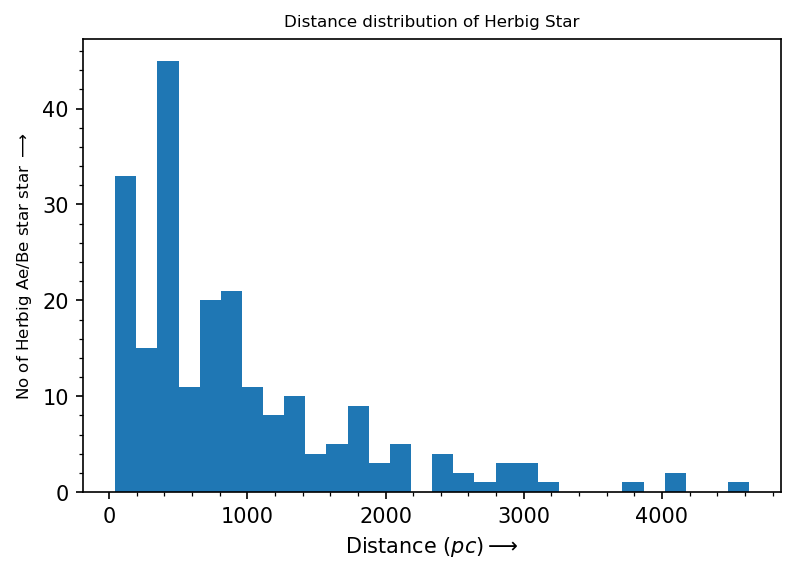

In [5]:
plt.figure(dpi=150)
plt.title("Distance distribution of Herbig Star", fontsize = 8)

#---------------------------------------------------------------------------------
#                     IMPORTING HISTOGRAM
"""   EXTRACTING INFORMATON OF HERBIG STAR DISTANCE HISTOGRAM    """

max_num_herbig, herbig_bin, patch = plt.hist(herbig_star["Dist"], bins=30)

#---------------------------------------------------------------------------------
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of Herbig Ae/Be star star $\longrightarrow$", fontsize = 8)
plt.minorticks_on()
plt.show()

### $\textbf{Importing Random star}$

In [6]:
all_random = pd.read_csv("test_star.csv")
random_star = all_random[(all_random["parallax_error"] < 0.1)] 
random_star = random_star[(random_star["r_med_photogeo"]> min(herbig_star["Dist"]))& (random_star["r_med_photogeo"] < max(herbig_star["Dist"])+1 )]
random_star = random_star.reset_index(drop=True)


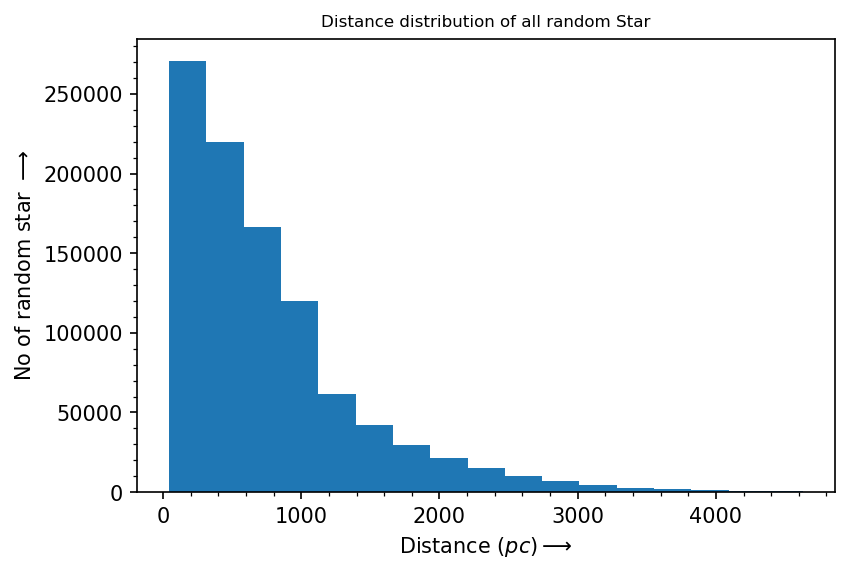

In [7]:

plt.figure(dpi=150)
plt.title("Distance distribution of all random Star", fontsize = 8)
plt.hist(random_star["r_med_photogeo"], bins = 17)
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

### $\textbf{Choosing 218 random star same as herbig distance distribution}$

In [8]:
num_star = np.zeros(len(max_num_herbig))
star_bin = herbig_bin
random_star_sample = pd.DataFrame()
sum_star = 0

while sum_star < 10000:
    random_sample = random_star.sample(1, replace= False)

    for i in range(len(max_num_herbig)):
    
        if (random_sample.iloc[0]["r_med_photogeo"] >= herbig_bin[i]) & (random_sample.iloc[0]["r_med_photogeo"] < herbig_bin[i+1]):
            if num_star[i] < (max_num_herbig[i]):
                random_star_sample = pd.concat((random_star_sample, random_sample), axis=0)
                num_star[i] += 1

        
        # print(sum_star)
    if sum(num_star)== sum(max_num_herbig):
        break
    sum_star += 1

            
            
            
            

In [9]:
random_star_sample = random_star_sample.sort_values(by='r_med_photogeo')
random_star_sample = random_star_sample.reset_index(drop=True)

In [10]:
random_star_sample

source_id          ra        dec   parallax  parallax_error  \
0    4576418328280987392  272.225870  21.995715  21.782791        0.030652   
1    3620908467071718016  196.912556 -14.188033  14.607836        0.066593   
2    2903371611193667712   88.902451 -29.916581  13.186063        0.031853   
3    5329785725496822400  131.415411 -46.503567  12.186710        0.034342   
4    4853364072986800512   52.705705 -38.843526  10.858317        0.025777   
..                   ...         ...        ...        ...             ...   
213  5876486889993366528  226.121689 -59.923419   0.897879        0.089299   
214  6422672245942828032  302.507496 -69.832097   0.301364        0.027453   
215  4298550402551678336  298.048634   8.539747   0.183127        0.043312   
216   189001070952207616   77.817089  40.755033   0.258518        0.041144   
217  5868200592366262144  200.470306 -63.147599   0.155801        0.053809   

     r_med_photogeo  r_lo_photogeo  r_hi_photogeo  phot_g_mean_mag  
0         45.683617      45.652596      45.711900         8.499897  
1         68.944880      68.818474      69.099230         7.616972  
2         75.511444      75.413420      75.594080         7.780891  
3         81.580055      81.450250      81.760994        10.792753  
4         91.522224      91.429955      91.619934        10.389590  
..              ...            ...            ...              ...  
213     3124.347200    2691.056200    3609.047600         9.720262  
214     3718.758800    3543.082300    3874.934800         9.897401  
215     4108.461000    3848.902800    4393.251000        10.852273  
216     4132.481000    3725.579800    4485.047000         9.984585  
217     4498.741700    4171.563000    4997.861000         9.978928  

[218 rows x 9 columns]

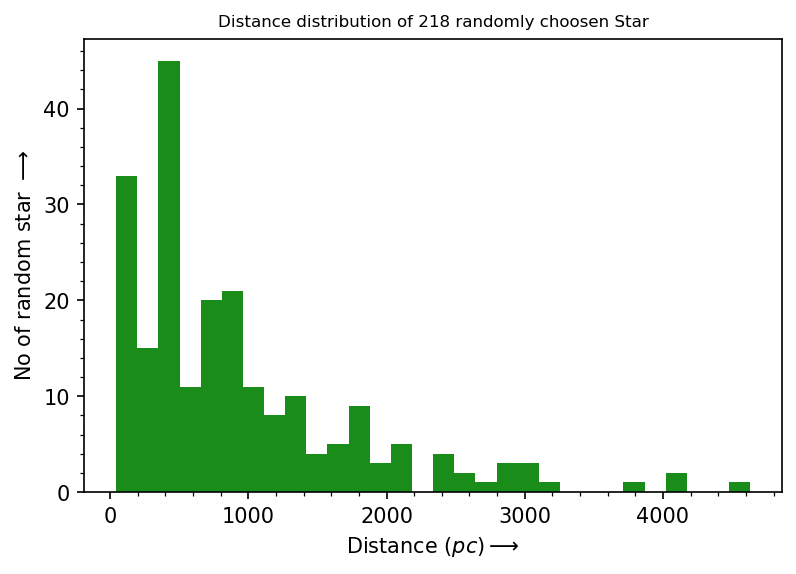

In [11]:

plt.figure(dpi=150)
plt.title("Distance distribution of 218 randomly choosen Star", fontsize = 8)
# histogram of the 218 randomly choosen star from our sample
plt.hist(random_star_sample['r_med_photogeo'], bins=herbig_bin, color = 'green', alpha = 0.9, ls = 'dotted')

# histogram of all 218 Herbig Ae/Be star
#plt.hist(herbig_star["Dist"], bins= herbig_bin, color = 'red', alpha = 0.8, ls = 'dashed')
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

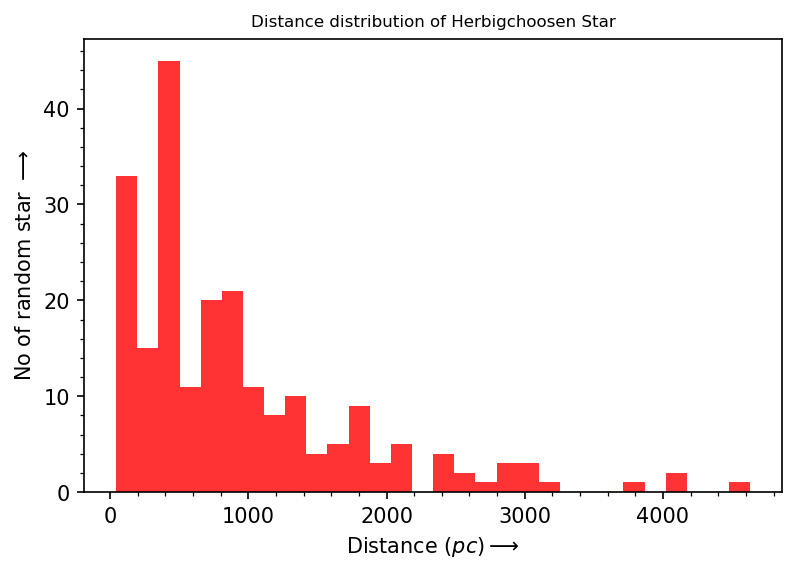

In [12]:

plt.figure(dpi=150)
plt.title("Distance distribution of Herbigchoosen Star", fontsize = 8)
# histogram of the 218 randomly choosen star from our sample
#plt.hist(random_star_sample['r_med_photogeo'], bins=herbig_bin, color = 'green', alpha = 0.9, ls = 'dotted')

# histogram of all 218 Herbig Ae/Be star
plt.hist(herbig_star["Dist"], bins= herbig_bin, color = 'red', alpha = 0.8, ls = 'dashed')
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

### $ \bm{\textbf{Extracting data from the gaia table around a star having ra and dec}}$

In [7]:
# defining a function for extracting data of stars from GAIA database around a choosen Object(Star or Herbig Ae/Be star)

# The function will take input query size, ra, dec of the centered boject and radius of the circle
# It will give output of ojects around that star in table form

def get_gaia_result(query_size, ra_obj, dec_obj, radius_deg):
    #from astroquery.gaia import Gaia

    query = """SELECT TOP {}""".format(query_size) + """
        g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, d3.r_med_geo, d3.r_lo_geo, d3.r_hi_geo, (d3.r_hi_geo - d3.r_lo_geo)/(2*d3.r_med_geo) AS sigma_geo, d3.r_med_photogeo, d3.r_lo_photogeo, d3.r_hi_photogeo,
        (d3.r_hi_photogeo - d3.r_lo_photogeo)/(d3.r_med_photogeo) AS sigma_photogeo, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.bp_rp, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv,
        w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro, tt.j_m, tt.h_m, tt.ks_m
        FROM gaiadr2.gaia_source as g, gaiadr2.allwise_best_neighbour as x, allwise_original_valid as w, gaiadr2.tmass_best_neighbour as t, tmass_original_valid as tt, external.gaiaedr3_distance AS d3
        WHERE CONTAINS(POINT(g.ra, g.dec), CIRCLE({}""".format(ra_obj) + """, {}""".format(dec_obj)+""", {}""".format(radius_deg) + """ )) = 1 AND g.parallax > 0.0 AND
        g.parallax IS NOT NULL AND g.bp_rp IS NOT NULL AND ((g.source_id = x.source_id AND x.allwise_oid = w.allwise_oid) AND (g.source_id = t.source_id AND t.tmass_oid = tt.tmass_oid)) AND (g.source_id = d3.source_id)
        """

    job = Gaia.launch_job(query)
    result = job.get_results()

    return result

In [11]:
# importing csv file of 1m sources containing Gaia data for plotting HR diagram
filename = '1M.csv'
df1 = pd.read_csv(filename)

# filtering data on the basis of parallax error so that we can get better observed sources
df = df1[df1['parallax_error']< 0.1]
df = df.reset_index(drop=True)


gk_1m = df["phot_g_mean_mag"] - df["ks_m"]
mg = df["mg"]

In [12]:
y_values1 = np.linspace(1, 4.5, 50)
y_values2 = np.linspace(4.5, 8.5, 100)
y_values3 = np.linspace(8.5, 14.0, 100)

### $\textbf{Counting function}$

#### $\textbf{Boundary Equation}$

In [8]:
# Defining the equation of straight line for the boundries

#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------


def equation1(y):
    # y = 1 - 5 * (x - 2.5)
    x = 2.5 - 1.0/5.0 * (y - 1)
    return x

def equation2(y):
    # y = 4.5 + 4.0/1.9 * (x - 1.8)
    x = 1.8 + 1.9/4.0 * (y - 4.5)
    return x

def equation3(y):
    #y = 8.5 + 40/9 * (x - 3.7)
    x = 3.7 + 9.0/40.0 * (y - 8.5)
    return x


#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

In [10]:
# Defining a function which will count red object
# just we need to pass list of object(stars) with G-K as X- coordinate and Absolute Magnitude(Mv) as Y-coordinate 

def counting_fun(her_mg, her_gk):

    count_red = 0

    for i in range(len(her_mg)):

        if her_mg[i] <= 4.5:
            if her_gk[i] >= equation1(her_mg[i]):
                count_red = count_red + 1
        
        elif 4.5 < her_mg[i] and her_mg[i] <= 8.5:
            if her_gk[i] >= equation2(her_mg[i]):
                count_red = count_red + 1

        elif 8.5 < her_mg[i]:
            if her_gk[i] >= equation3(her_mg[i]):
                count_red = count_red + 1


    return count_red

In [30]:
def plot_function(list_star, index_star):


    ra = list_star["RAICRS"][index_star]

    dec = list_star["DEICRS"][index_star]
    Dist = list_star["Dist"][index_star]
    E_Dist = list_star["E_Dist"][index_star]
    e_dist = list_star["e_Dist"]


    rad = 6.0 
    result = get_gaia_result(10000, ra, dec, rad/60.0)
    result = result.to_pandas()
    result = result[result["parallax_error"] < 0.3]


    res_gk = result["phot_g_mean_mag"] - result["ks_m"]
    res_mg = result["mv"]
    red_star = counting_fun(res_mg, res_gk)
    
    fig = plt.figure(figsize=(10,12), dpi=125)
    grid = plt.GridSpec(5, 3, wspace=0.4, hspace=0.4)
    # make subplots
    ax1 = plt.subplot(grid[0:3, 0:2])
    ax2 = plt.subplot(grid[3, 0:])
    ax3 = plt.subplot(grid[4, 0:])

    
    ax1.set_title("For star, Source_id/Name = {}".format(id), fontsize = 8)
    ax1.scatter(gk_1m, mg, c = 'blue', s=1, alpha=0.3)
    ax1.scatter(res_gk, res_mg, c = 'red', s = 5, label = 'red star = {}'.format(red_star))
    ax1.minorticks_on()
    ax1.grid(True)
    ax1.legend()
    ax1.set_ylim(max(df.mg)+1, -5)
    ax1.set_xlabel(r"$G - K~~\longrightarrow$", fontsize = 8)
    ax1.set_ylabel(r"Absolute Magnitude (G)$\longrightarrow$", fontsize = 7)
    ax1.plot(equation1(y_values1), y_values1,  color = 'orange')
    ax1.plot(equation2(y_values2), y_values2,  color = 'orange')
    ax1.plot(equation3(y_values3), y_values3, color = 'orange')

    

    ax2.scatter(result["r_med_photogeo"], result["ra"], c = 'red', s = 5)
    ax2.scatter(Dist, ra, c = 'blue', s = 10)
    ax2.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 6)
    ax2.set_ylabel(r"ra $\longrightarrow$")
    
    # Filtering out the value 
    # result = result.to_pandas()
    sigma_herb = (E_Dist + e_dist)/2

    result = result[abs(result["r_med_geo"] - Dist) < (2.0*np.sqrt(((result["r_hi_geo"] - result["r_lo_geo"])/2.0 )**2 + sigma_herb**2 ))]
           
    
    res_gk = result["phot_g_mean_mag"] - result["ks_m"]
    res_mg = result["mv"]
    red_star = counting_fun(res_mg, res_gk)

    #ax3.set_title("Stars after filterig out distance error, dist_error < {}".format(frac), fontsize = 6)
    ax3.scatter(result["r_med_photogeo"], result["ra"], c = 'green', s = 5, label = "No. of red star = {}".format(red_star))
    ax3.scatter(Dist, ra, c = 'blue', s = 10)
    ax3.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 8)
    ax3.set_ylabel(r"ra $\longrightarrow$", fontsize = 8)
    ax3.legend()
    ax2.minorticks_on()
    ax3.minorticks_on()
    plt.show()

In [31]:
plot_function(herbig_star, 3)

KeyError: 0

### $\textbf{Defining a function for finding fraction of red star surrounding to main source within some search radius}$

In [16]:
def final_result(herbig_star_list, random_star_list, search_radius):
    

    def list_red_object(radius):

        num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_her = []   # For red object around Herbig Ae/Be star
        num_tot_star_rand = []  # For toatal star around random star
        num_red_star_rand = []  # For red objec around the Random Star

        # After  distance filter

        after_num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        after_num_red_star_her = []   # For red object around Herbig Ae/Be star
        after_num_tot_star_rand = []  # For toatal star around random star
        after_num_red_star_rand = []  # For red objec around the Random Star
        


        for i in range(herbig_star_list.shape[0]):

            herbig_star = get_gaia_result(1000, herbig_star_list.loc[i][1], herbig_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            herbig_star = herbig_star[herbig_star["parallax_error"] < 0.3]
            her_mg = herbig_star["mv"]
            her_gk = herbig_star["phot_g_mean_mag"] - herbig_star["ks_m"]

            # Considering only those sources which lies within the 2*sigma distance error of the main source.

            sigma_herb = (herbig_star_list["e_Dist"][i] + herbig_star_list["E_Dist"][i])/2
            y1 = herbig_star_list["Dist"][i] - 2 *sigma_herb
            y2 = herbig_star_list["Dist"][i] + 2 *sigma_herb

            after_herbig = herbig_star#[herbig_star["dist_frac"] < 0.2]
            after_herbig = after_herbig[(after_herbig["r_med_photogeo"] > y1) & (after_herbig["r_med_photogeo"] < y2)]
            her_mg_af = after_herbig["mv"]
            her_gk_af = after_herbig["phot_g_mean_mag"] - after_herbig["ks_m"]


            
            #-----------------------------------------------------------------------------
            rand_star = get_gaia_result(1000, random_star_list.loc[i][1], random_star_list.loc[i][2], radius)
            rand_star = rand_star[rand_star["parallax_error"] < 0.3]
            rand_mg = rand_star["mv"]
            rand_gk = rand_star["phot_g_mean_mag"] - rand_star["ks_m"]

            # -----------------------------------------
            sigma_star = (random_star_list["r_hi_photogeo"][i] - random_star_list["r_lo_photogeo"][i])/2
            x1 = random_star_list["r_med_photogeo"][i] - 2 *sigma_star
            x2 = random_star_list["r_med_photogeo"][i] + 2 *sigma_star
            after_star = rand_star#[rand_star["dist_frac"] < 0.2]
            after_star = after_star[(after_star["r_med_photogeo"] > x1) & (after_star["r_med_photogeo"] < x2)]
        
            rand_mg_af = after_star["mv"]
            rand_gk_af = after_star["phot_g_mean_mag"] - after_star["ks_m"]
            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a Herbig Ae/Be Star"""

            her_red_star = counting_fun(her_mg, her_gk)

            num_tot_star_her.append(len(her_mg))
            num_red_star_her.append(her_red_star)


            af_her_red = counting_fun(her_mg_af, her_gk_af)
            after_num_tot_star_her.append(len(her_mg_af))
            after_num_red_star_her.append(af_her_red)


            """ Counting Red Object around a Random Star"""
            
            rand_red_star = counting_fun(rand_mg, rand_gk)
            num_tot_star_rand.append(len(rand_mg))
            num_red_star_rand.append(rand_red_star)


            af_star_red = counting_fun(rand_mg_af, rand_gk_af)
            after_num_tot_star_rand.append(len(rand_mg_af))
            after_num_red_star_rand.append(af_star_red)


            # print("total number of red object surrounding the Herbig Star {}".format(herbig_20.loc[i][0]) + " = {}".format(num_red_stars))
            # print("Toatal surrounding stars = {}".format(len(her_mg)))


        # print("List of total stars surrounding a herbig star within 6 arcminutes = ",num_tot_star_her) 
        # print("List red stars for 20 Herbig Stars = ",num_red_star_her)
        # print("List of total stars surrounding a Random star within 6 arcminutes = ",num_tot_star_rand) 
        # print("List red stars for 20 Random stars = ",num_red_star_rand)

        return num_red_star_her, num_tot_star_her, num_red_star_rand, num_tot_star_rand, after_num_red_star_her, after_num_tot_star_her, after_num_red_star_rand, after_num_tot_star_rand
        

    rad_arcmin = search_radius
    all_list = list_red_object(rad_arcmin/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    num_red_star_rand = all_list[2]
    num_tot_star_rand = all_list[3]
    af1 = all_list[4]
    af2 = all_list[5]
    af3 = all_list[6]
    af4 = all_list[7]


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    frac_before_herb = []
    frac_before_rand = []
    frac_after_herb = []
    frac_after_rand = []

    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_before_herb.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            frac_before_herb.append(f1)
        


        if af2[i] == 0:
            f1 = 0.0
            frac_after_herb.append(f1)
        
        else:
            f1 = af1[i]/af2[i]
            frac_after_herb.append(f1)


        # THIS IS FOR RANDOM STAR

        if num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_before_rand.append(f1)

        else:
            f1 = num_red_star_rand[i]/num_tot_star_rand[i]
            frac_before_rand.append(f1)
        


        if af4[i] == 0:
            f1 = 0.0
            frac_after_rand.append(f1)
        
        else:
            f1 = af3[i]/af4[i]
            frac_after_rand.append(f1)

    
    her_avg_frac_bf = np.average(frac_before_herb)
    her_avg_frac_af = np.average(frac_after_herb)

    rnd_avg_frac_bf = np.average(frac_before_rand)
    rnd_avg_frac_af = np.average(frac_after_rand)


    # fig, ax = plt.subplots(dpi = 300)
    # ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 8)
    # ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
    
    # ax.plot(random_star_list["r_med_photogeo"], frac_before_rand, '--', marker = "*", linewidth = 0.8, markersize = 5, label = "Random before", alpha = 0.6)
    # ax.plot(random_star_list["r_med_photogeo"], frac_after_rand, "-.", marker = "^", linewidth = 0.8, markersize = 5, label = "Random after", alpha = 0.6)
    # ax.hlines(y=rnd_avg_frac_bf, xmin=500, xmax= 1000, color = 'orange')
    # ax.hlines(y=rnd_avg_frac_af, xmin=500, xmax= 1000, color='yellow')



    # ax.plot(herbig_star_list["Dist"], frac_before_herb, marker = "D", linewidth = 0.8, markersize = 4, label = "Herbig before", alpha = 0.5)
    # ax.plot(herbig_star_list["Dist"], frac_after_herb, marker = "o", linewidth = 0.8, markersize = 5, label = "Herbig after", alpha = 0.5)
    # ax.hlines(y=her_avg_frac_bf, xmin=500, xmax= 1000, color = 'red')
    # ax.hlines(y=her_avg_frac_af, xmin=500, xmax= 1000, color='green')
    # ax.legend(fontsize = 6)
    # # ax.set_xscale("log")
    # ax.minorticks_on()
    # ax.set_title("""Plot of fraction of red star vs distance.\n Comparison in between before and after applying the "error in distance" filter \n Serach radius = {} arcminute""".format(rad_arcmin), fontsize = 8)
    # plt.show()


    return frac_before_herb, frac_after_herb, frac_before_rand, frac_after_rand

    

In [17]:
result = final_result(herbig_star, random_star_sample, 5.0)

### $\textbf{T TAURI}$

In [115]:
def final_result_tauri(t_tauri_star_list, search_radius):
    

    def list_red_object(radius):

        num_tot_star_tau = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_tau = []   # For red object around Herbig Ae/Be star
        
        


        for i in range(t_tauri_star_list.shape[0]):

            t_tauri = get_gaia_result(1000, t_tauri_star_list.loc[i][1], t_tauri_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            t_tauri = t_tauri[t_tauri["parallax_error"] < 0.3]
            tau_mg = t_tauri["mv"]
            tau_gk = t_tauri["phot_g_mean_mag"] - t_tauri["ks_m"]

            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a T-Tauri Star"""

            tau_red_star = counting_fun(tau_mg, tau_gk)

            num_tot_star_tau.append(len(tau_mg))
            num_red_star_tau.append(tau_red_star)


        return num_red_star_tau, num_tot_star_tau

    rad_arcmin = search_radius
    all_list = list_red_object(rad_arcmin/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    tauri_red_frac = []


    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            tauri_red_frac.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            tauri_red_frac.append(f1)
        

    return tauri_red_frac

    

In [116]:
tauri = pd.read_csv('t tauri.csv')
tauri_star = tauri[["Name", "_RA", "_DE", "mag"]]
tauri_star = tauri_star.sort_values(by='mag')
tauri_star = tauri_star.reset_index(drop=True)


In [8]:
tauri

NameError: name 'tauri' is not defined

In [120]:
tauri_result = final_result_tauri(tauri_star[0:50], 6.0)

In [122]:
np.average(tauri_result)

0.3098663249737987

(array([25.,  5.,  2.,  2.,  2.,  3.,  2.,  1.,  0.,  8.]),
 array([0.        , 0.09645669, 0.19291339, 0.28937008, 0.38582677,
        0.48228346, 0.57874016, 0.67519685, 0.77165354, 0.86811024,
        0.96456693]),
 <BarContainer object of 10 artists>)

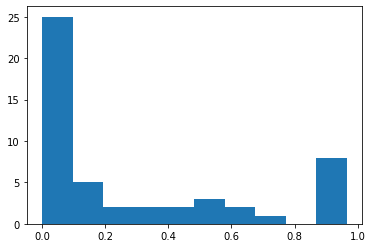

In [121]:
plt.hist(tauri_result)

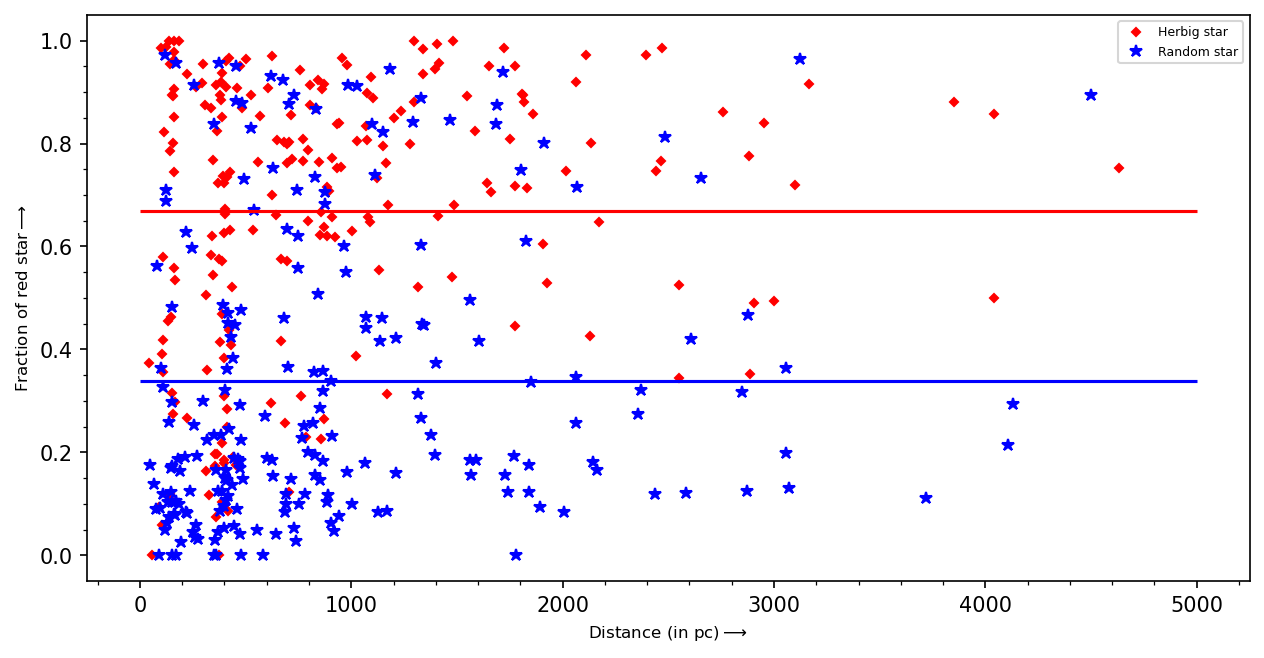

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize = (10, 5))
ax.plot(herbig_star["Dist"],result[0], linestyle = ' ', marker = "D",markersize = 3, color = 'red', label = 'Herbig star')
ax.plot(random_star_sample["r_med_photogeo"], result[2], linestyle = ' ', marker = "*", color = 'blue', label = 'Random star')
# ax.plot(herbig_within_1000["Dist"], radius_10[1], linestyle = '-.', marker = "o", color = 'green', label = '10 arcminute')
ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 8)
ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
ax.hlines(np.average(result[0]), xmin=0, xmax=5000, color = 'red')
ax.hlines(np.average(result[2]), xmin=0, xmax=5000, color = 'blue')
ax.legend(fontsize = 6)
ax.minorticks_on()
plt.show()

In [126]:
# EXtracting data about fraction of red objects around Herbig Ae/Be star and Random star

frac_herb = result[0]
frac_rand = result[2]

In [85]:
bins_range = np.linspace(0.0, 1.0, 21, endpoint = True)

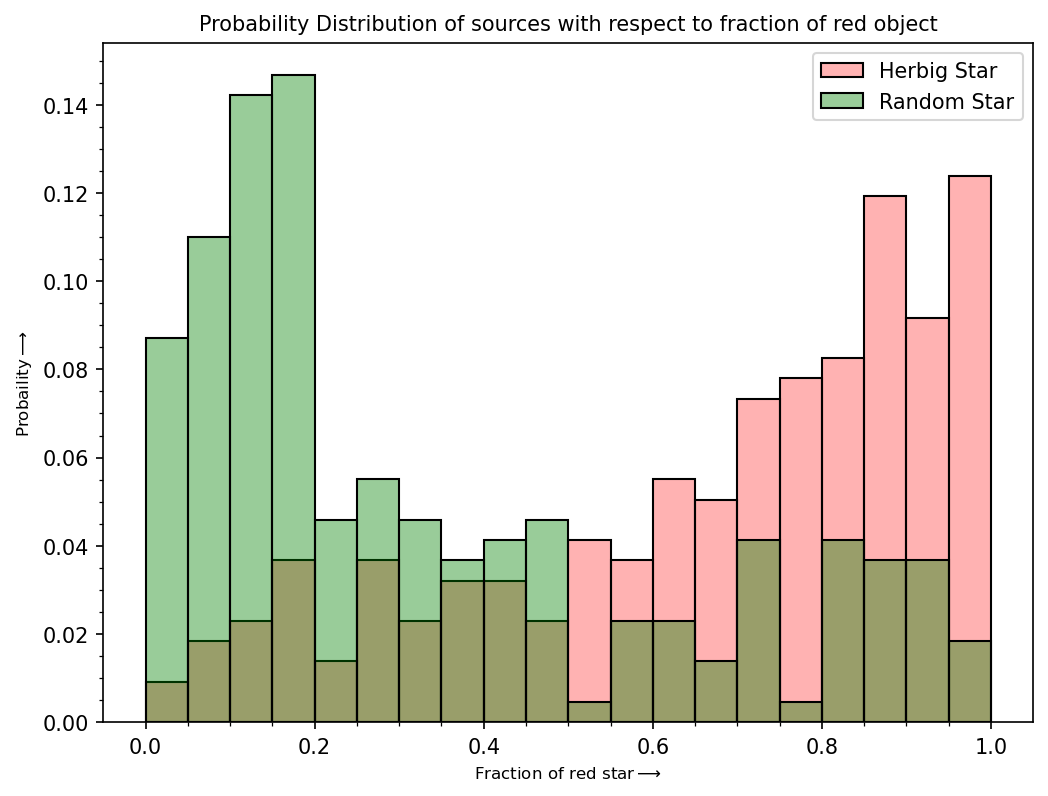

In [127]:
from cProfile import label


fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 150, figsize = (8, 6), sharex=True)
sn.histplot(frac_herb, bins = bins_range, stat='probability', color='red', alpha = 0.3, label='Herbig Star', element='bars')
sn.histplot(frac_rand, bins = bins_range, stat='probability', color = 'green',alpha = 0.4, label='Random Star', element = 'bars')
ax.legend()
ax.set_ylabel(r"Probaility$\longrightarrow$", fontsize = 8)
ax.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
ax.set_title("Probability Distribution of sources with respect to fraction of red object", fontsize = 10)
ax.minorticks_on()
plt.show()

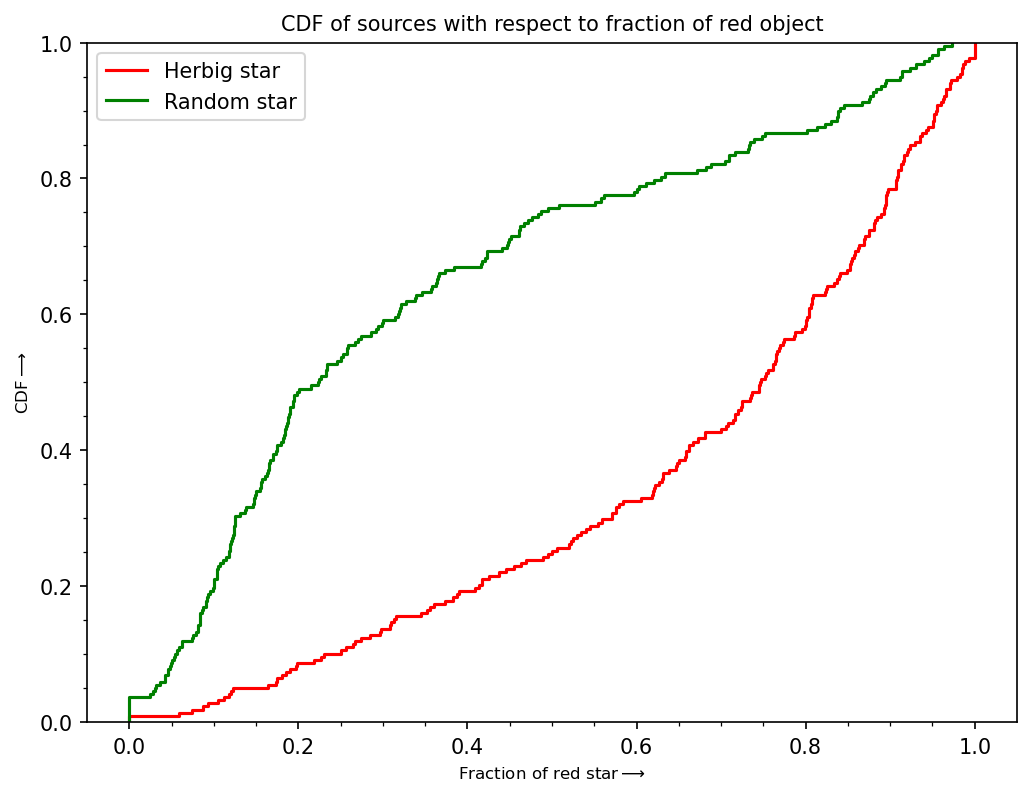

In [128]:

fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 150, figsize = (8, 6), sharex=True)
sn.ecdfplot(frac_herb, color = 'red', label='Herbig star')
sn.ecdfplot(frac_rand, color = 'green', label = 'Random star')
ax.legend()
ax.set_title("CDF of sources with respect to fraction of red object", fontsize = 10)

ax.set_ylabel(r"CDF$\longrightarrow$", fontsize = 8)
ax.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
ax.minorticks_on()
plt.show()

### $\textbf{Data analysis according to bin interval}$

In [89]:
# Data plotting according to bin


herb_sample = herbig_star[(herbig_star["Dist"] >= herbig_bin[0]) & (herbig_star["Dist"] < herbig_bin[1])]
herb_sample = herb_sample.reset_index(drop=True)
rand_sample = random_star_sample[(random_star_sample["r_med_photogeo"] >= herbig_bin[0]) & (random_star_sample["r_med_photogeo"] < herbig_bin[1])]
rand_sample = rand_sample.reset_index(drop=True)

# --------------------------------------------------------
result_sample = final_result(herb_sample, rand_sample, 6.0)

#--------------------------------------------------------------
before_frac_herb = result_sample[0]
after_frac_herb = result_sample[1]
before_frac_rand = result_sample[2]
after_frac_rand = result_sample[3]



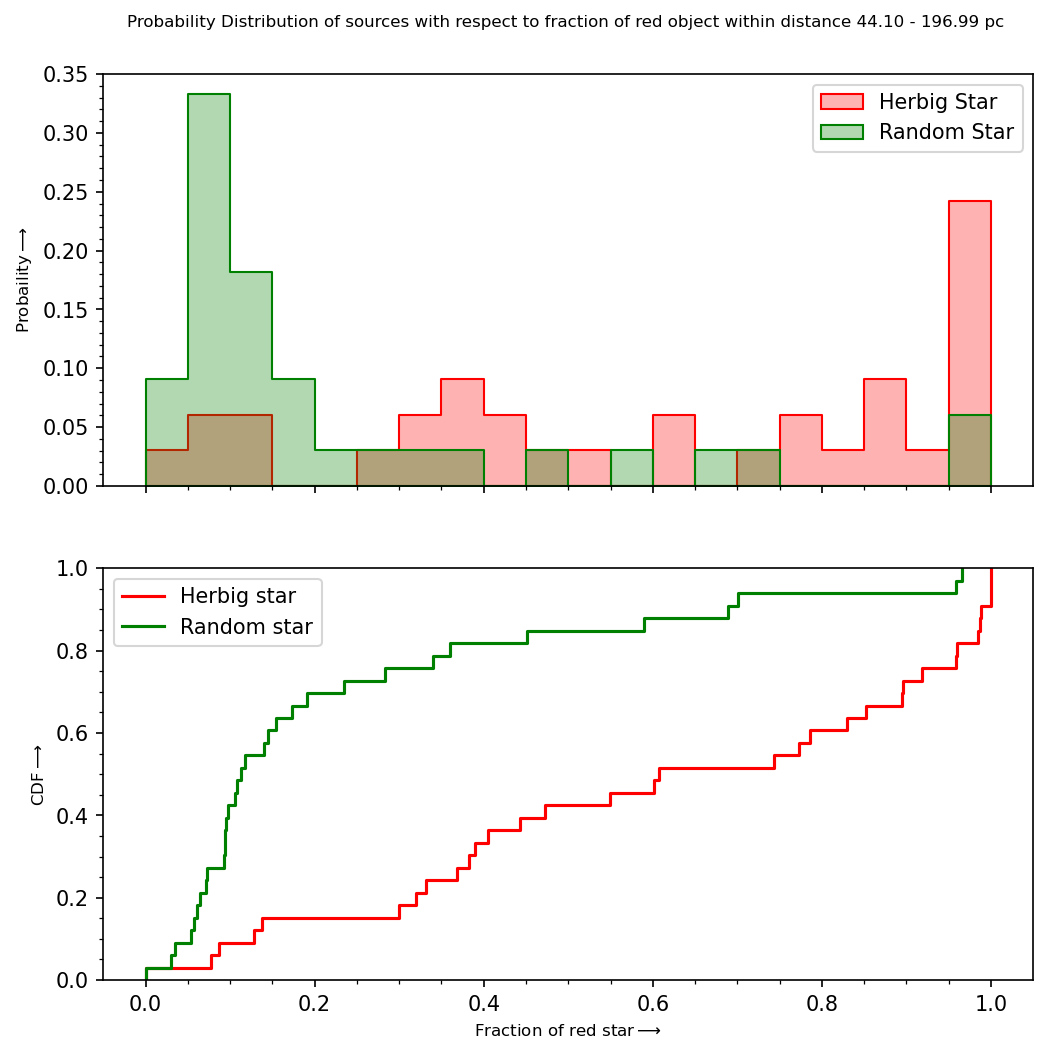

In [90]:
from cProfile import label

fig, ax = plt.subplots(nrows=2, ncols=1, dpi = 150, figsize = (8, 8), sharex=True)
sn.histplot(before_frac_herb, bins = bins_range, ax=ax[0], stat='probability', color='red', alpha = 0.3, label='Herbig Star', element='step')
sn.histplot(before_frac_rand, bins = bins_range, ax=ax[0], stat='probability', color = 'green',alpha = 0.3, label='Random Star', element = 'step')
ax[0].legend()
ax[0].set_ylabel(r"Probaility$\longrightarrow$", fontsize = 8)
ax[0].set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
ax[0].set_title("Probability Distribution of sources with respect to fraction of red object within distance {:4.2f} - {:4.2f} pc \n \n".format(herbig_bin[0], herbig_bin[1]), fontsize = 8)
ax[0].minorticks_on()
# ax[0].spines['bottom'].set_visible(False)
# ax[0].spines['top'].set_visible(False)


sn.ecdfplot(before_frac_herb, ax=ax[1], color = 'red', label='Herbig star')
sn.ecdfplot(before_frac_rand, ax = ax[1], color = 'green', label = 'Random star')
ax[1].legend()
ax[1].set_ylabel(r"CDF$\longrightarrow$", fontsize = 8)
ax[1].set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
ax[1].minorticks_on()
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)

plt.show()


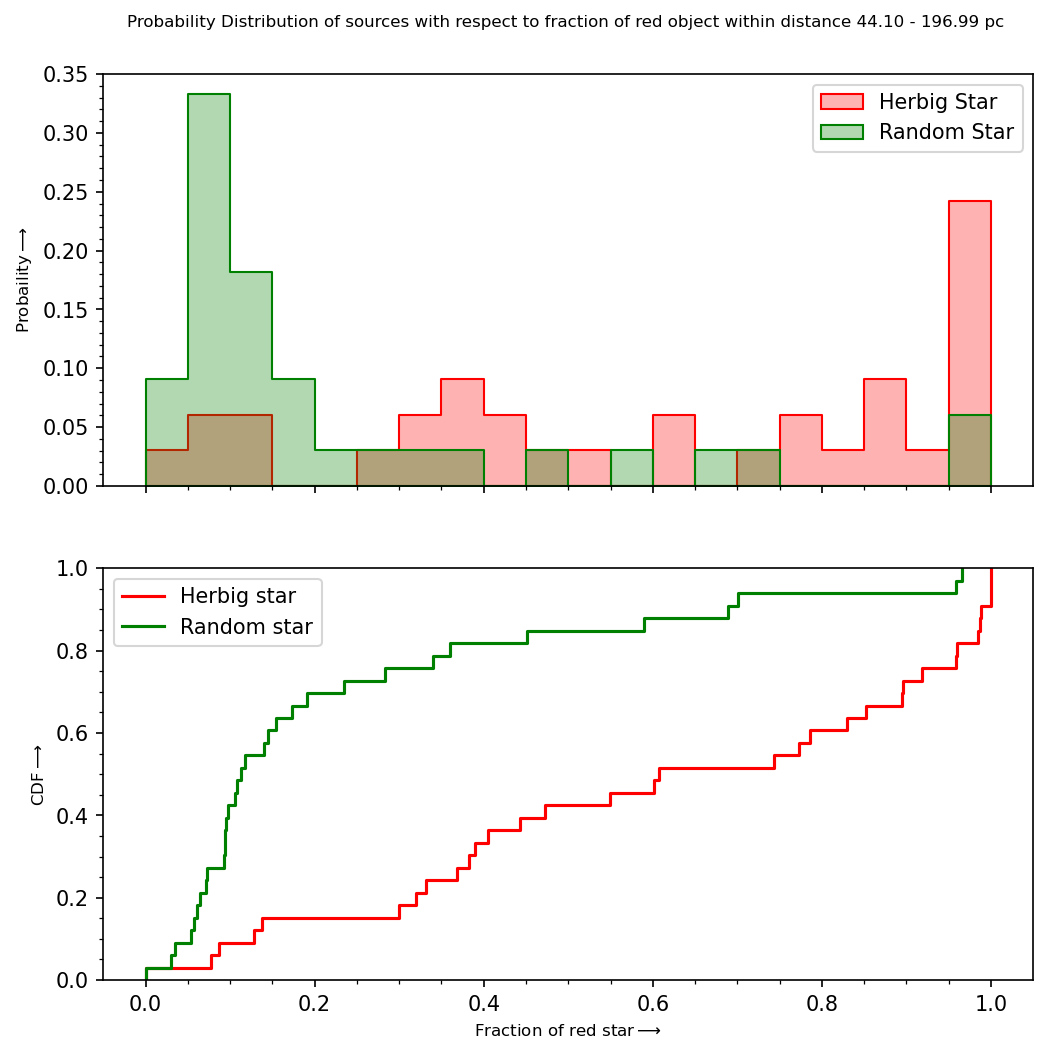

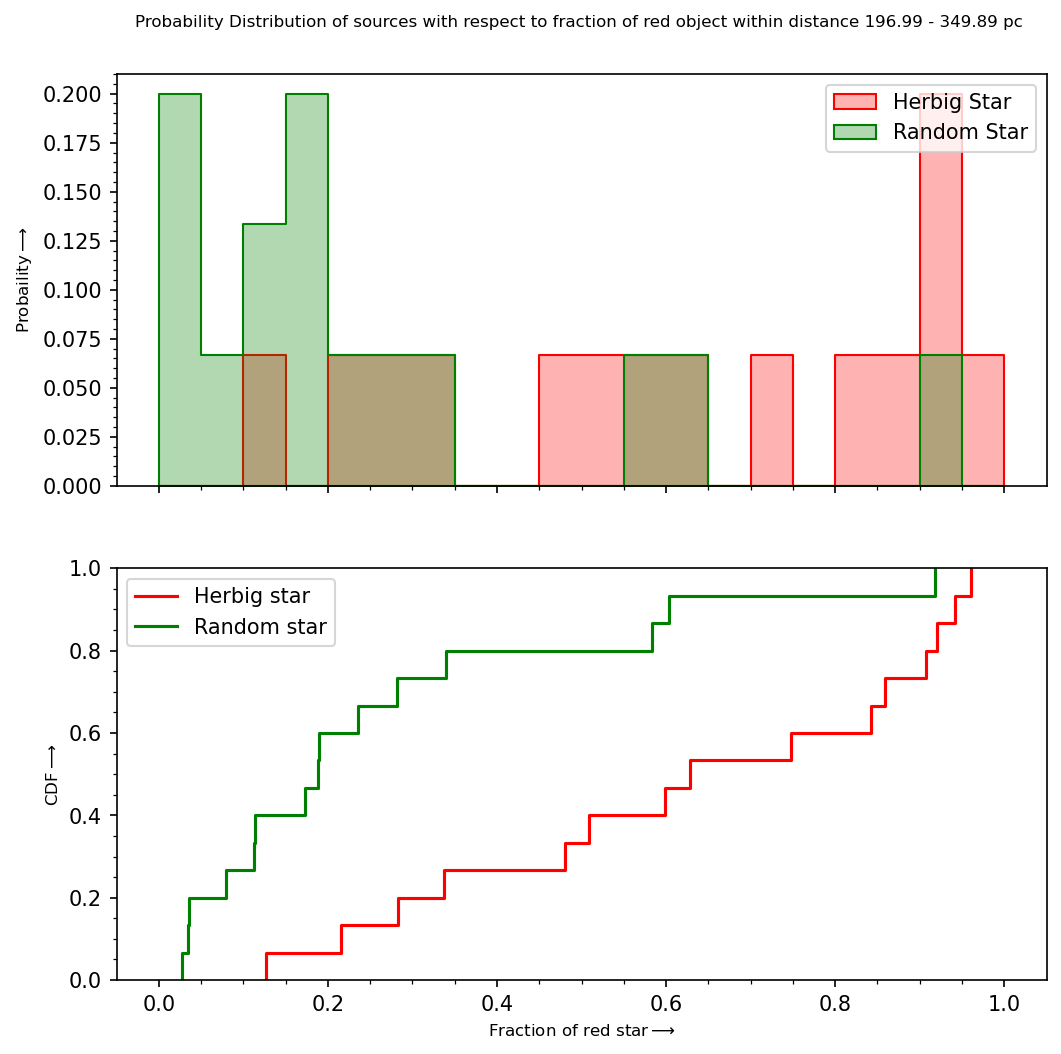

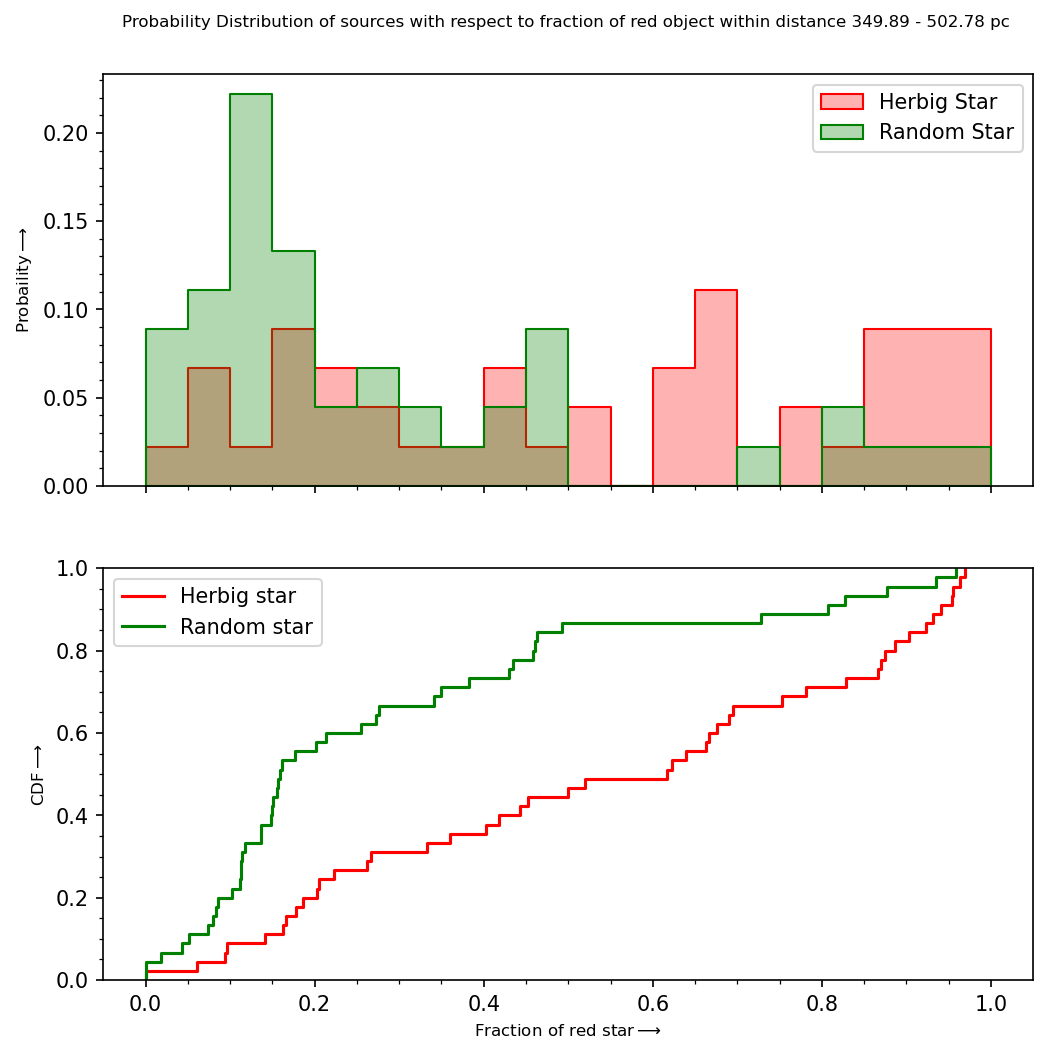

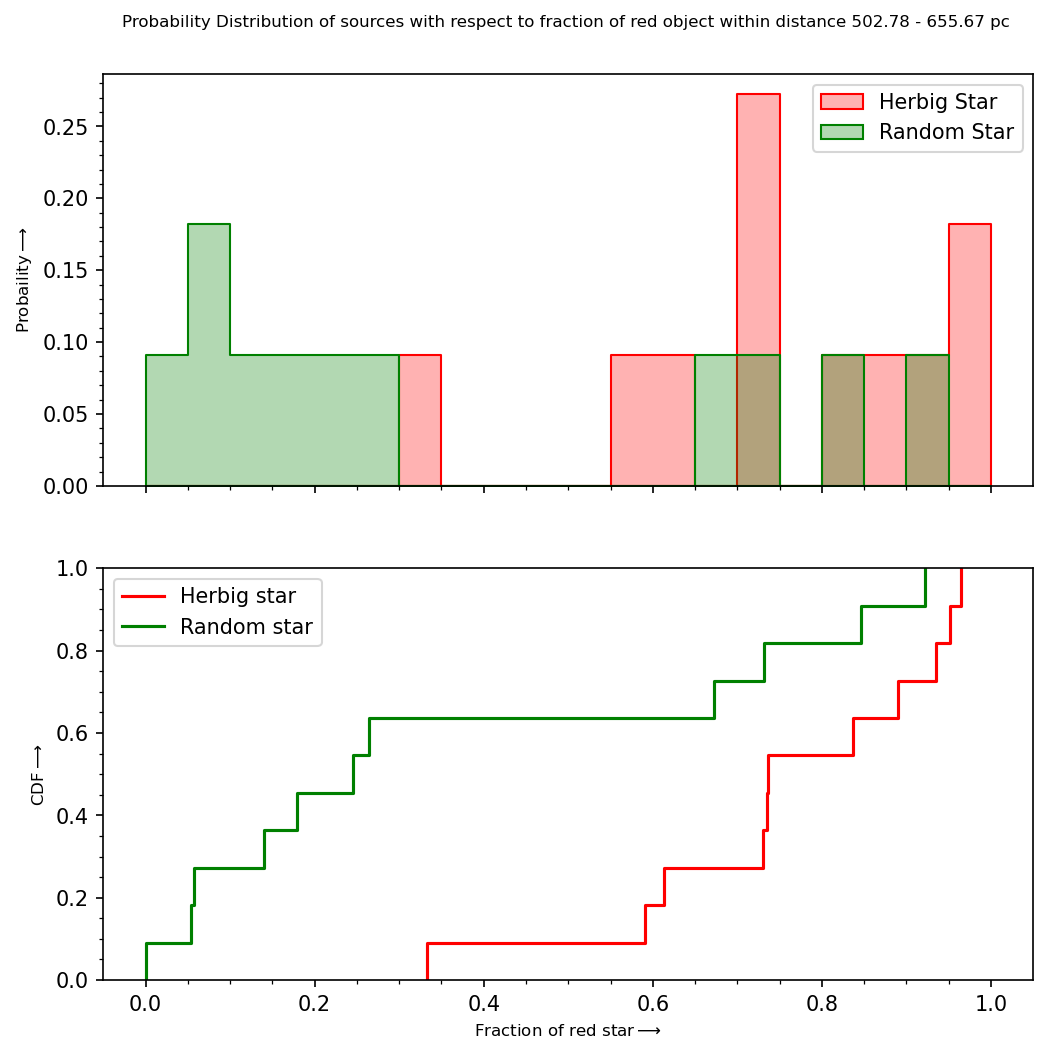

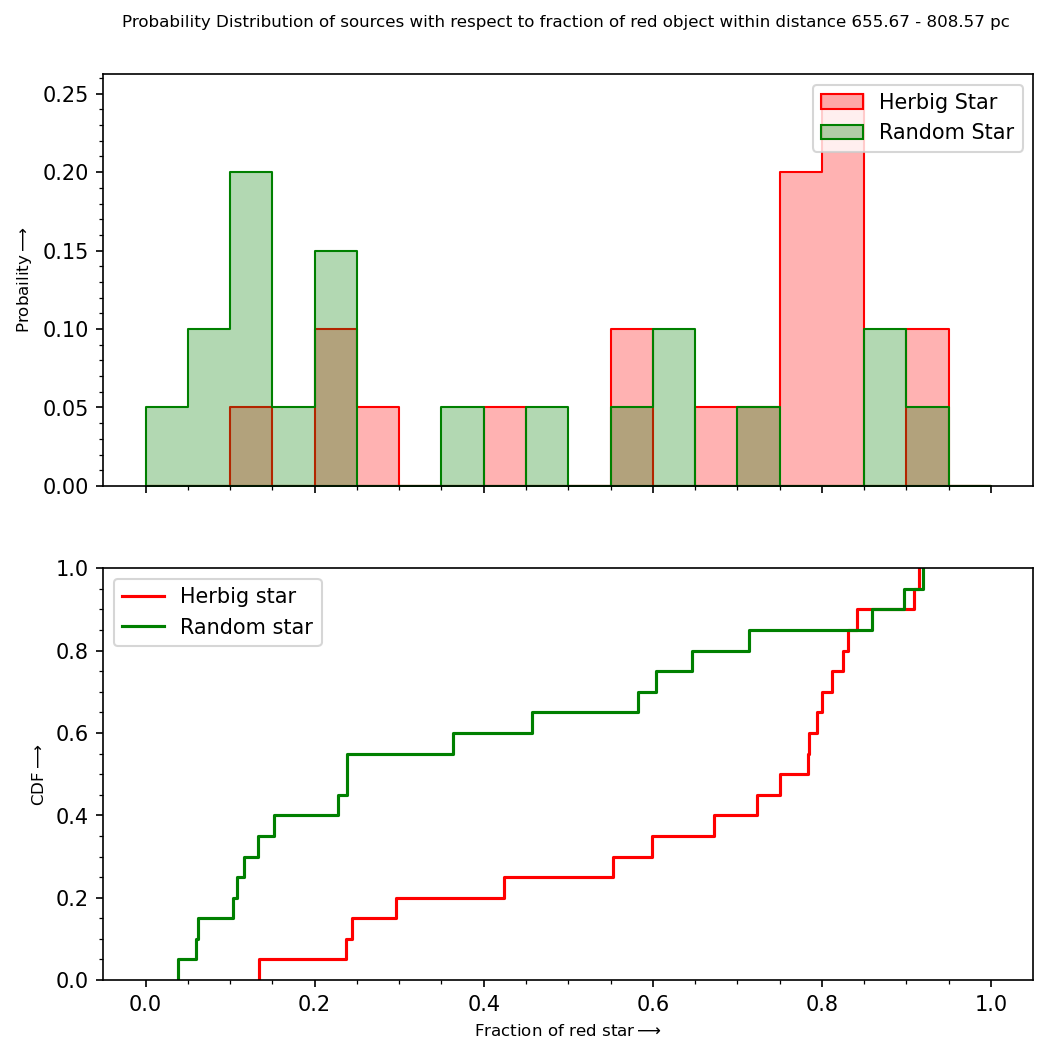

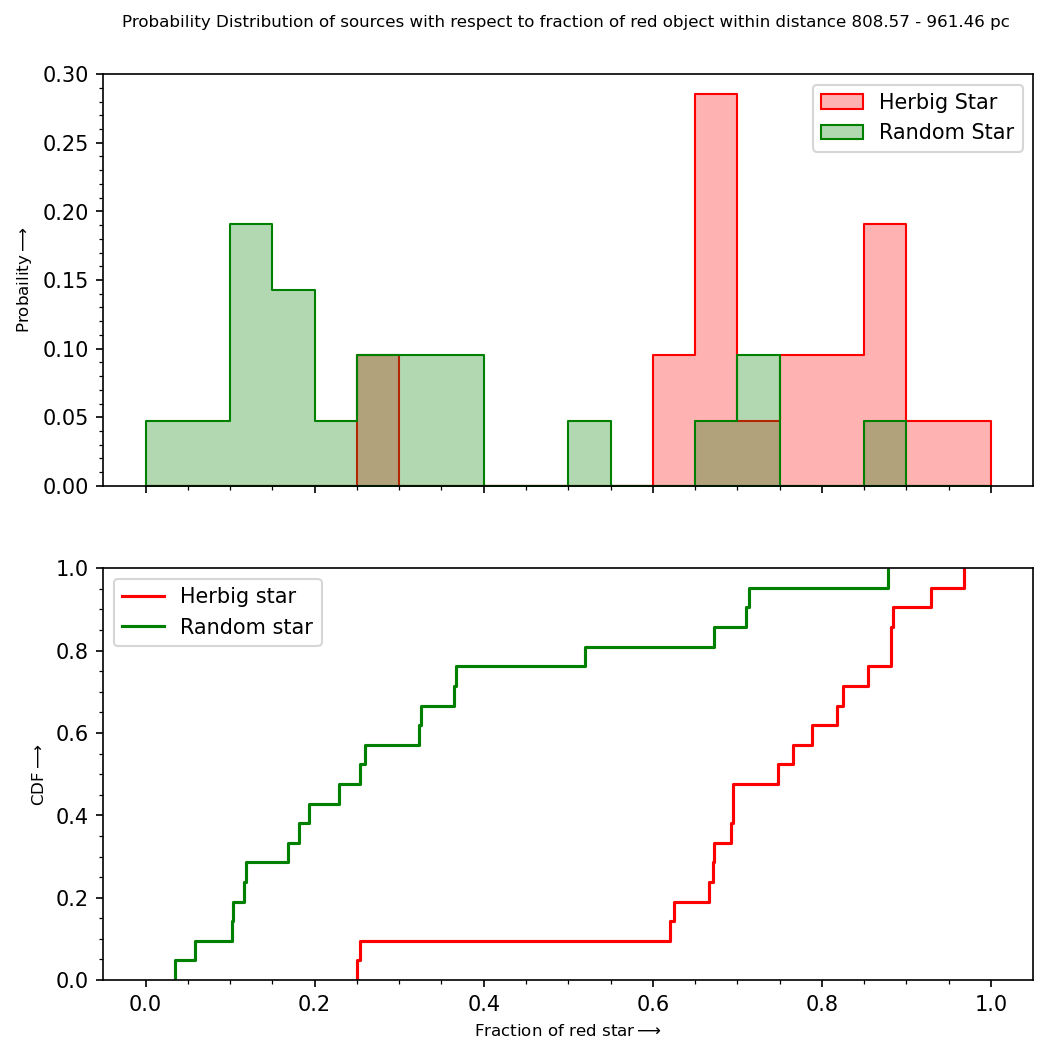

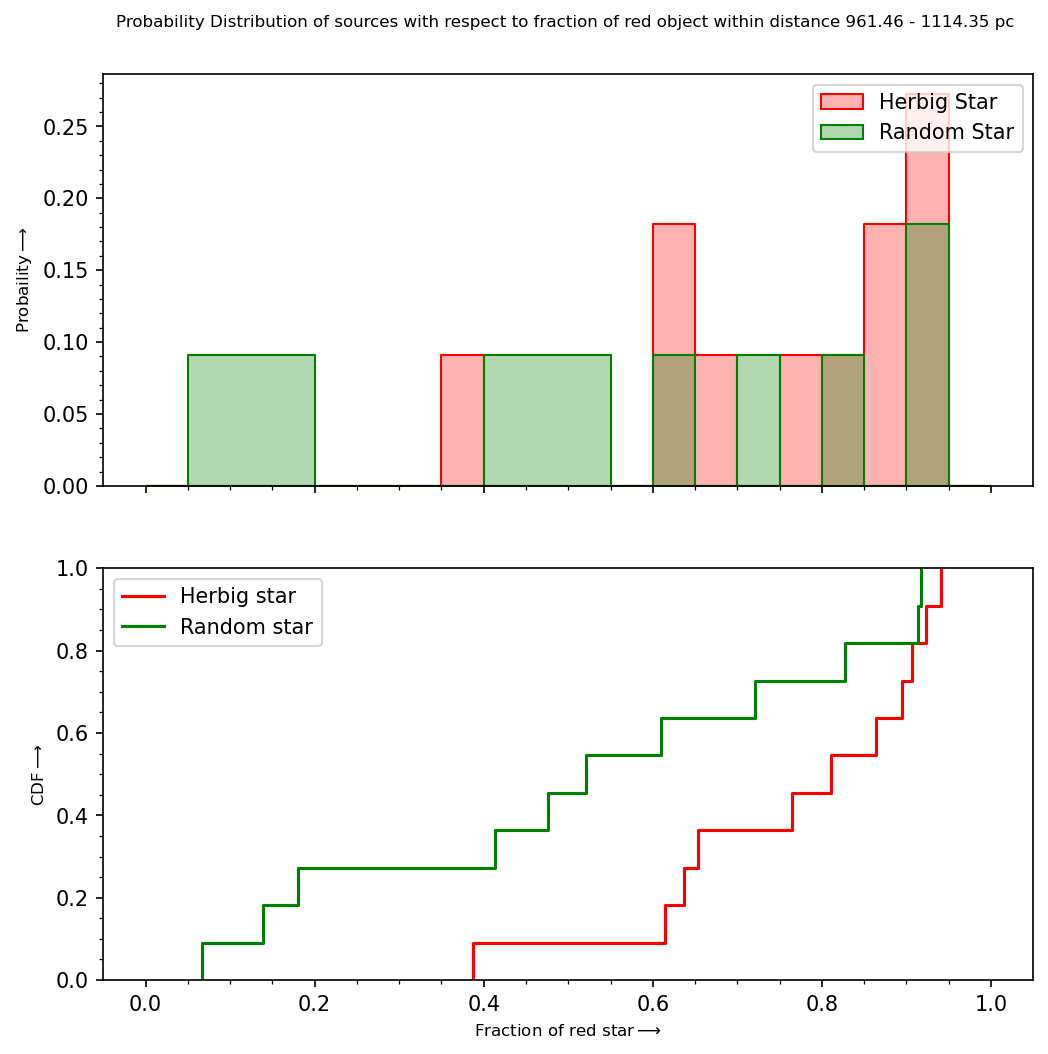

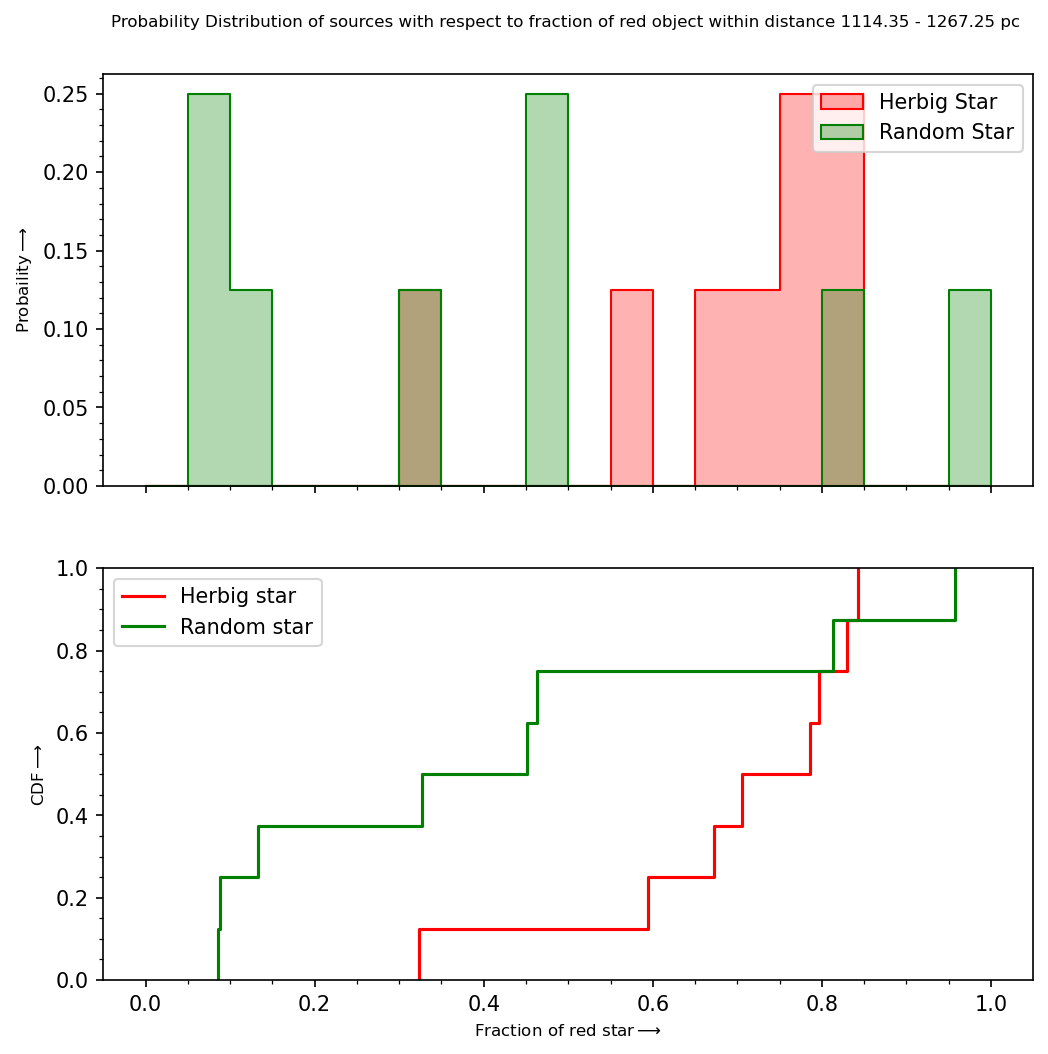

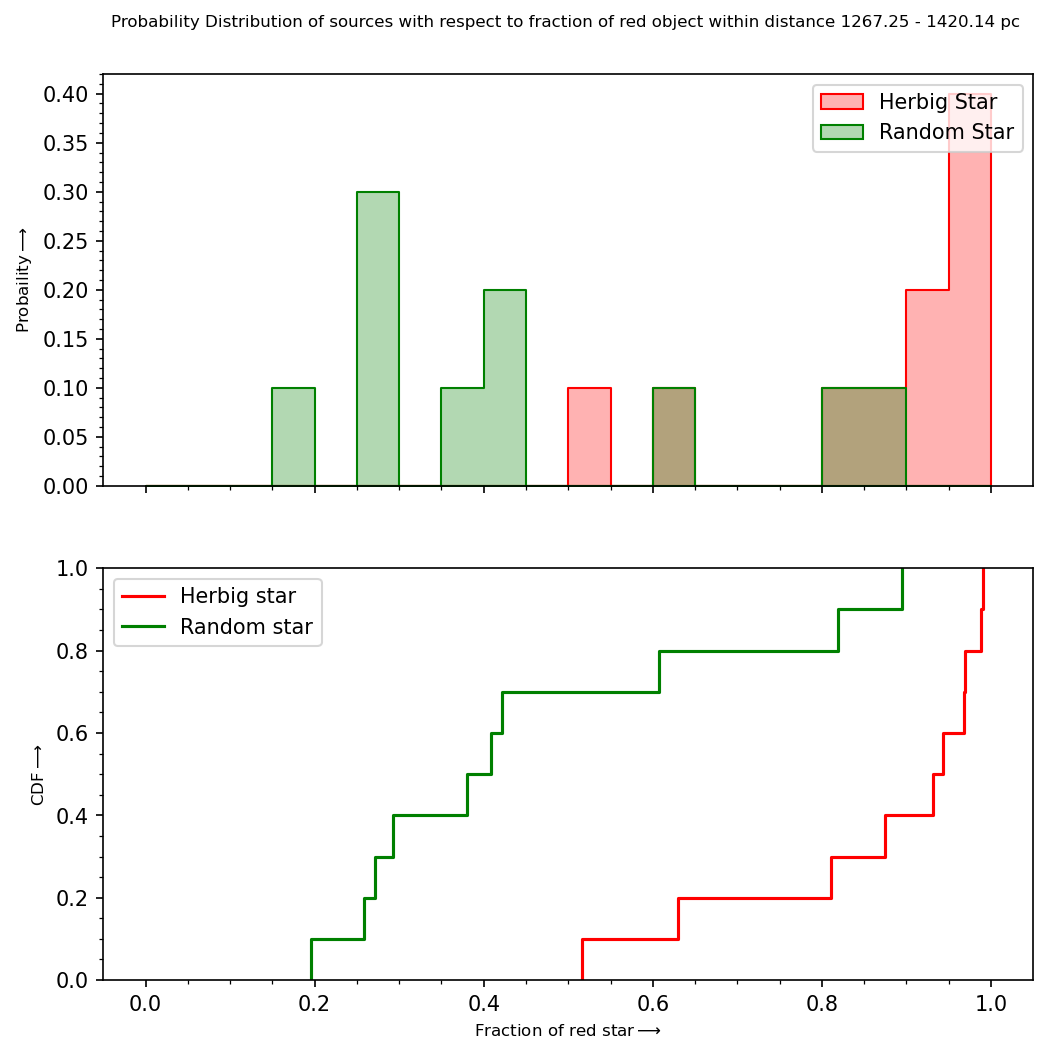

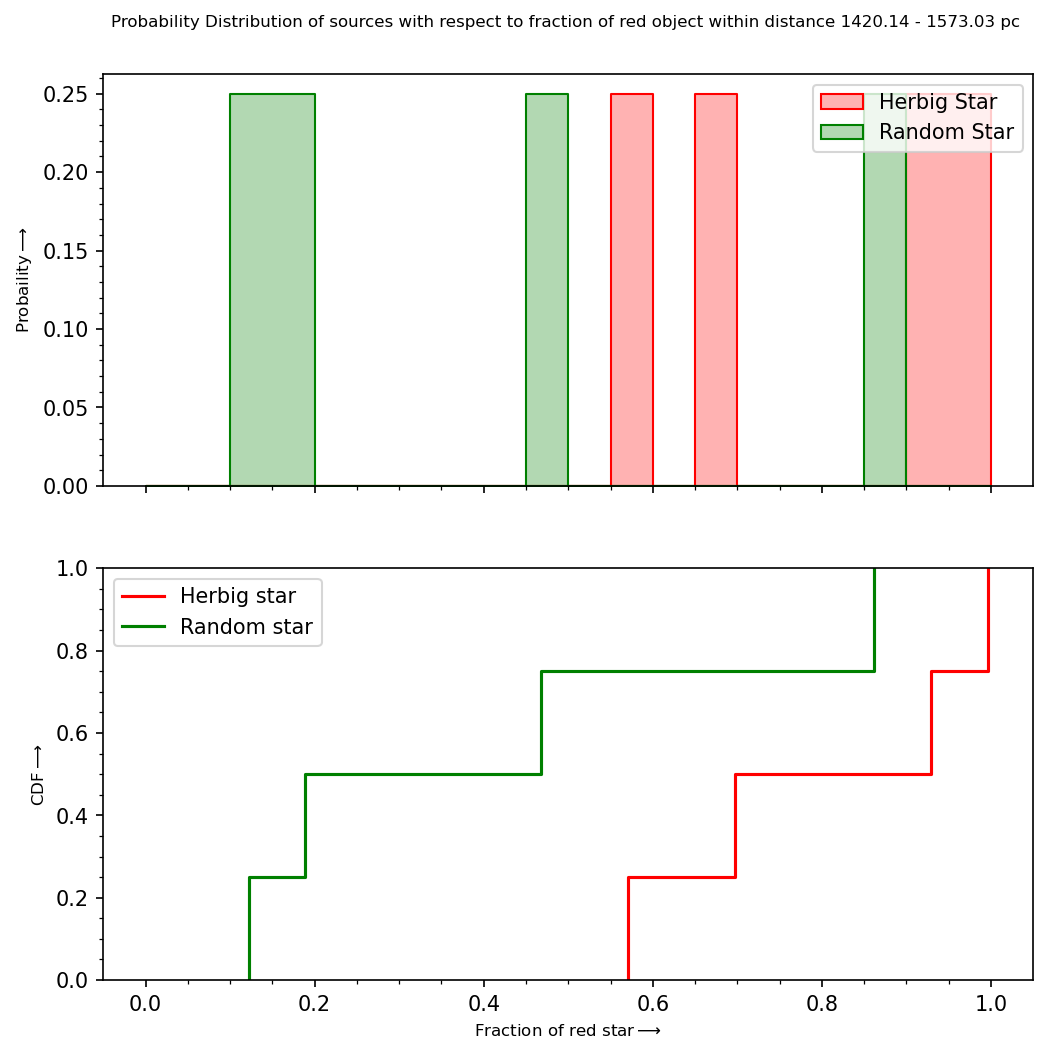

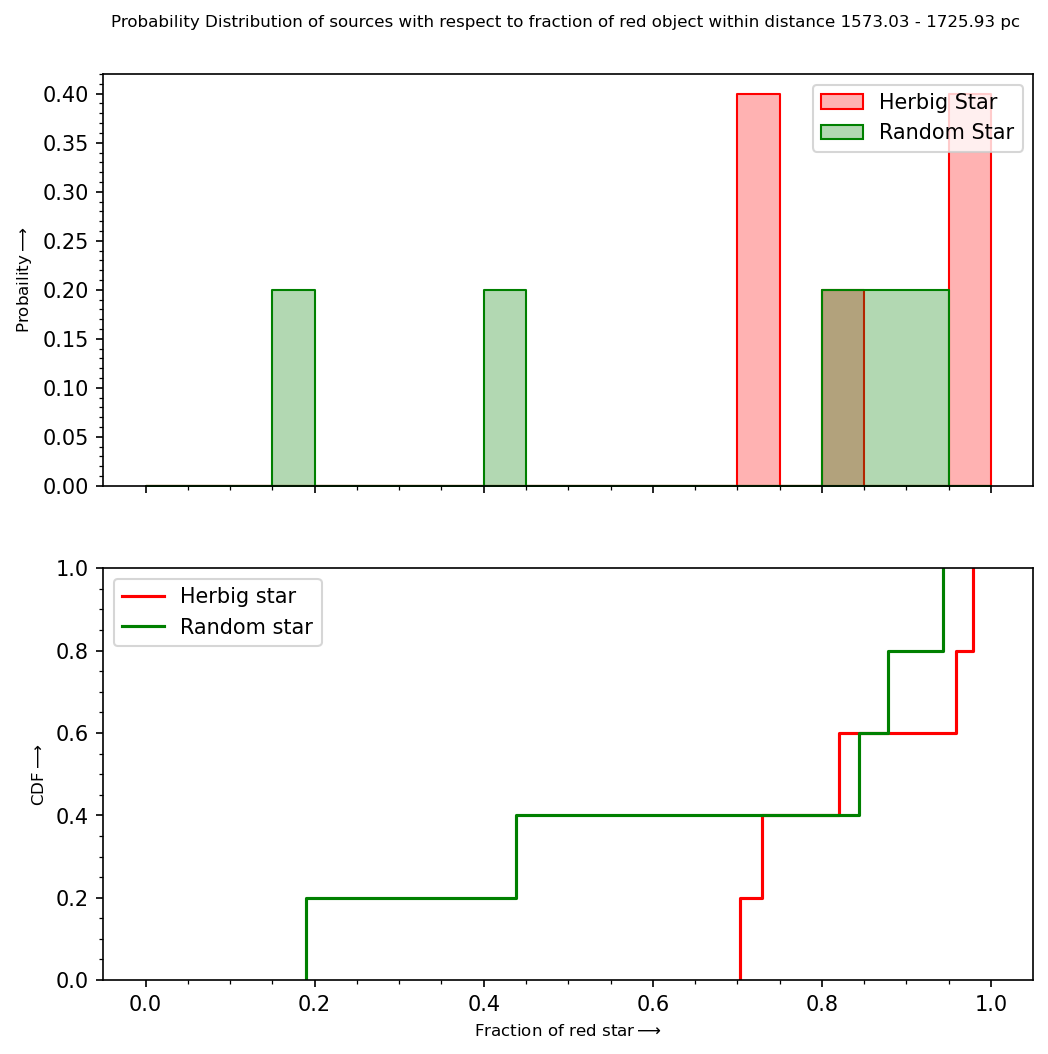

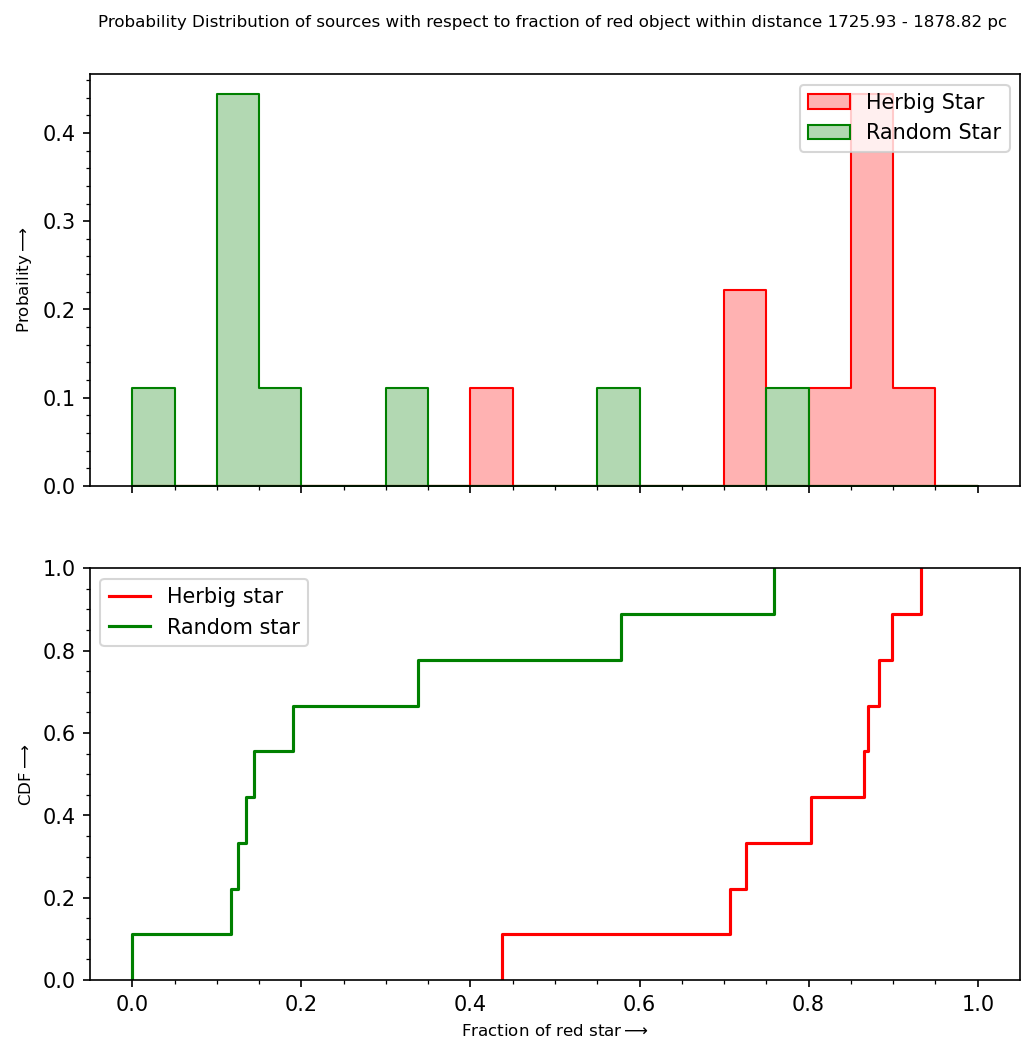

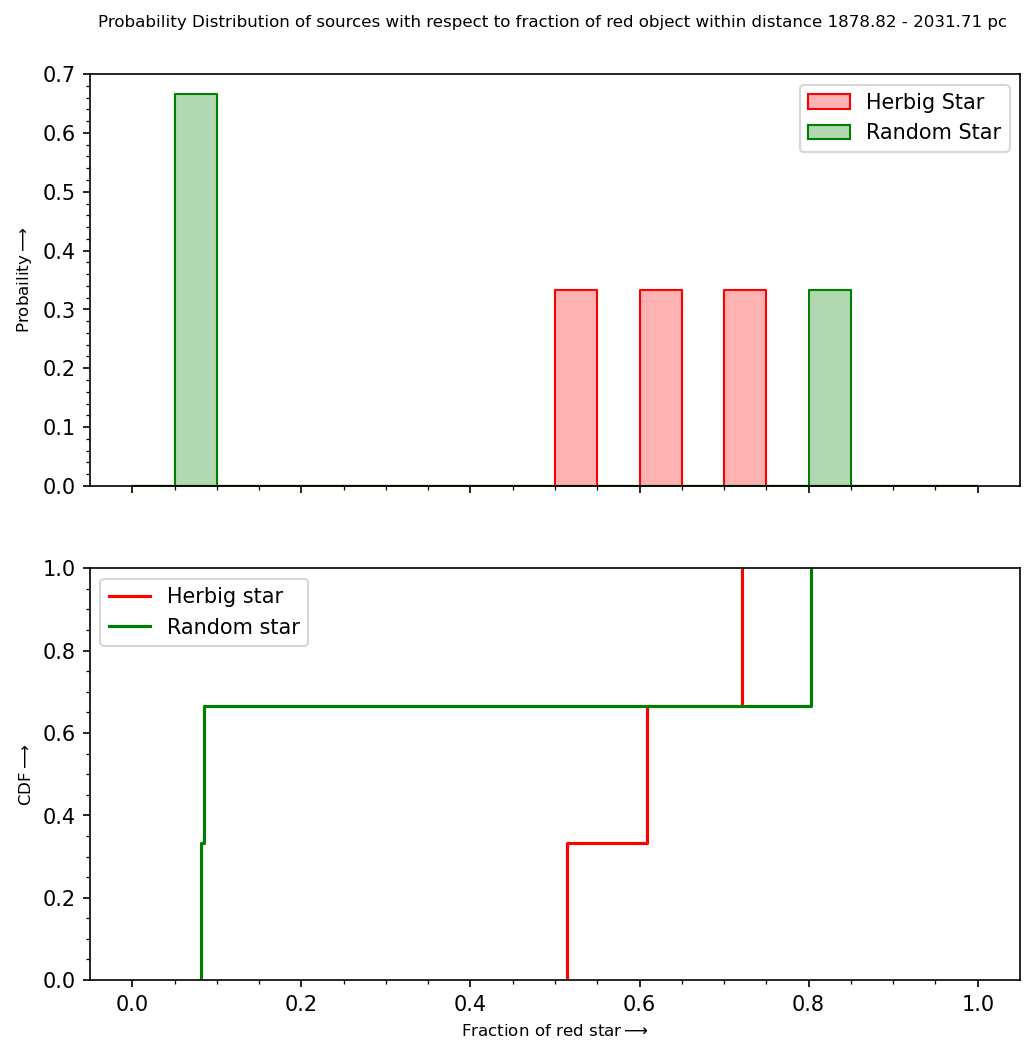

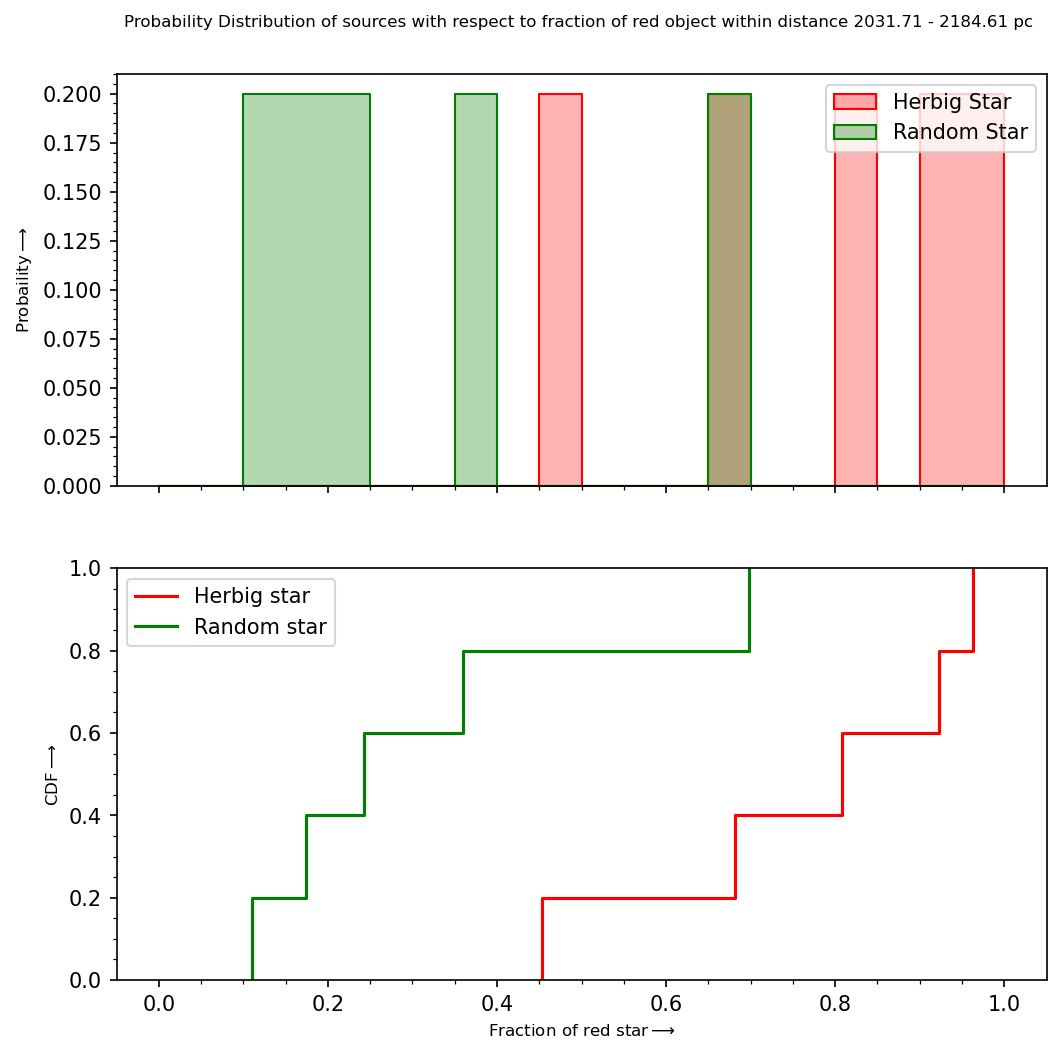

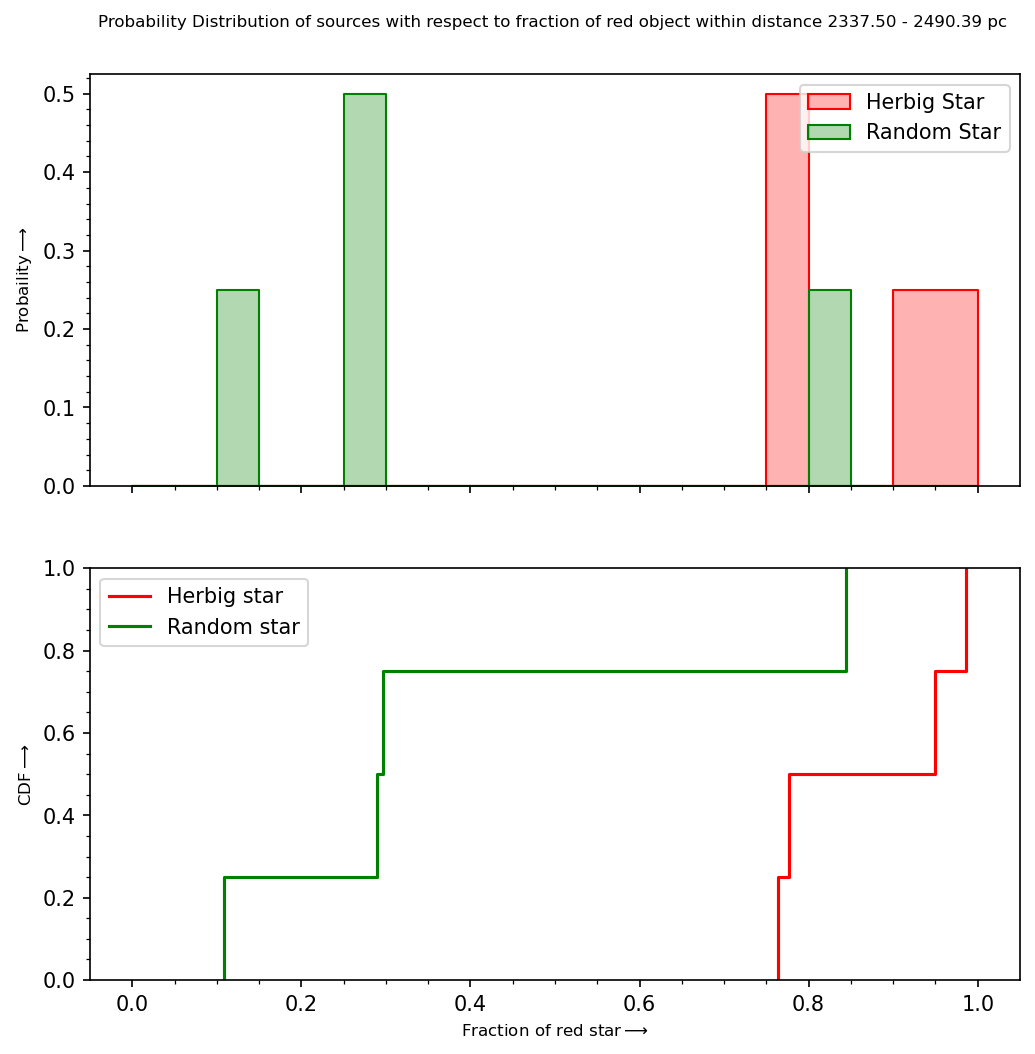

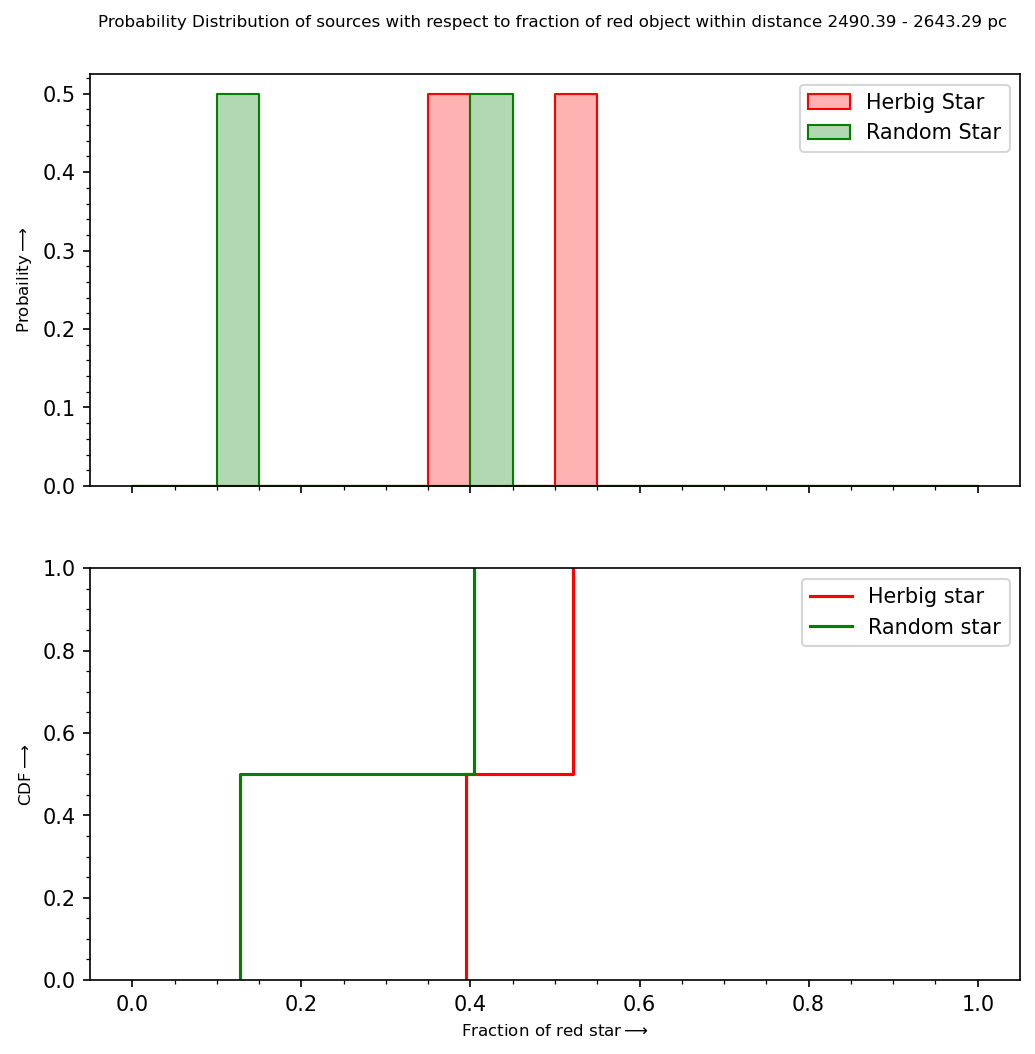

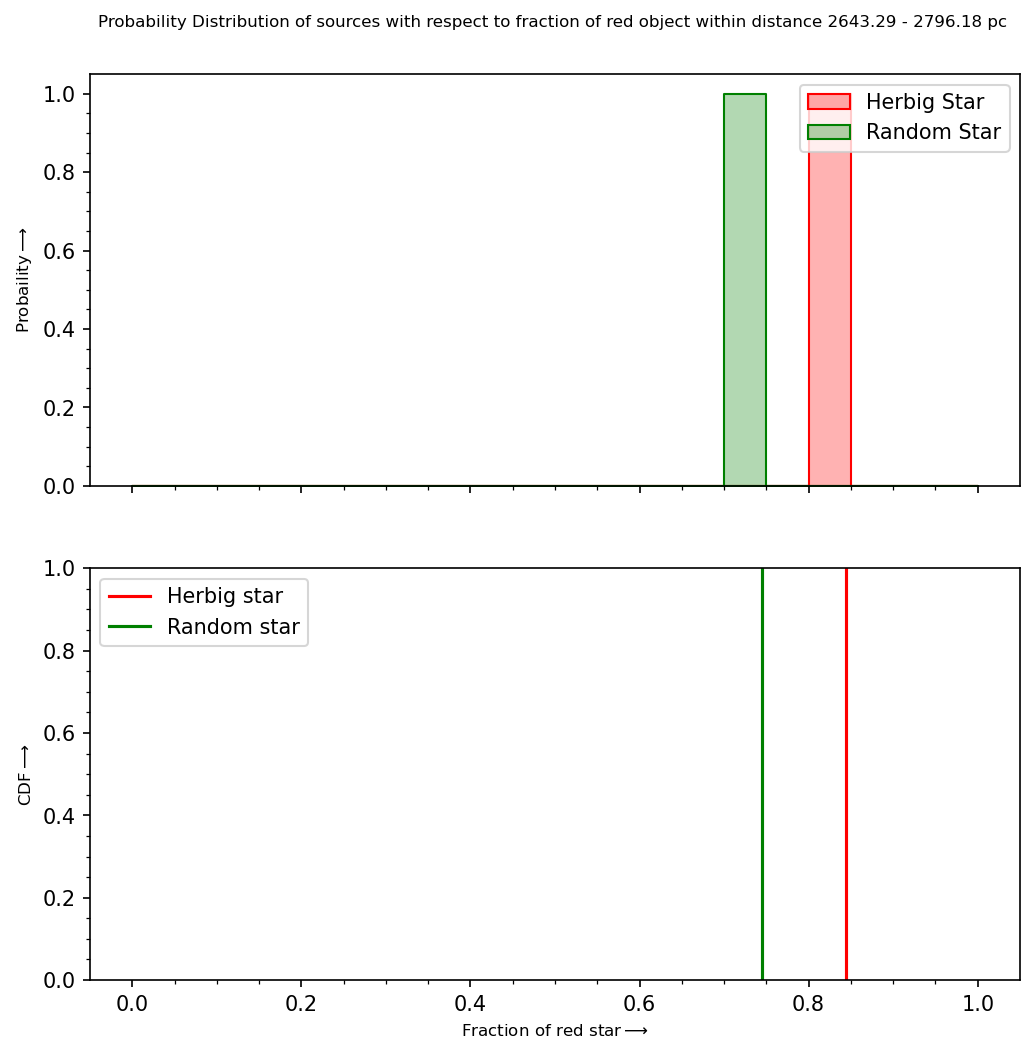

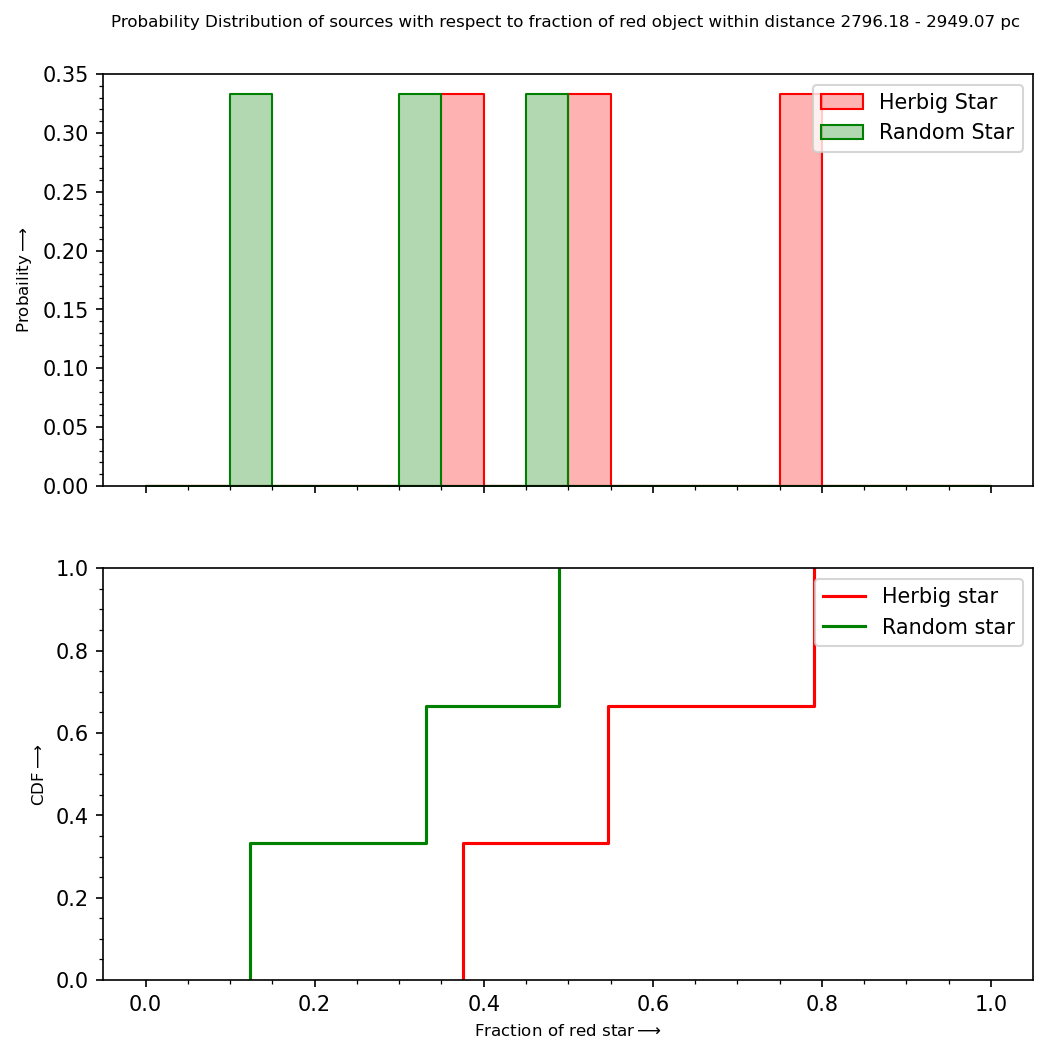

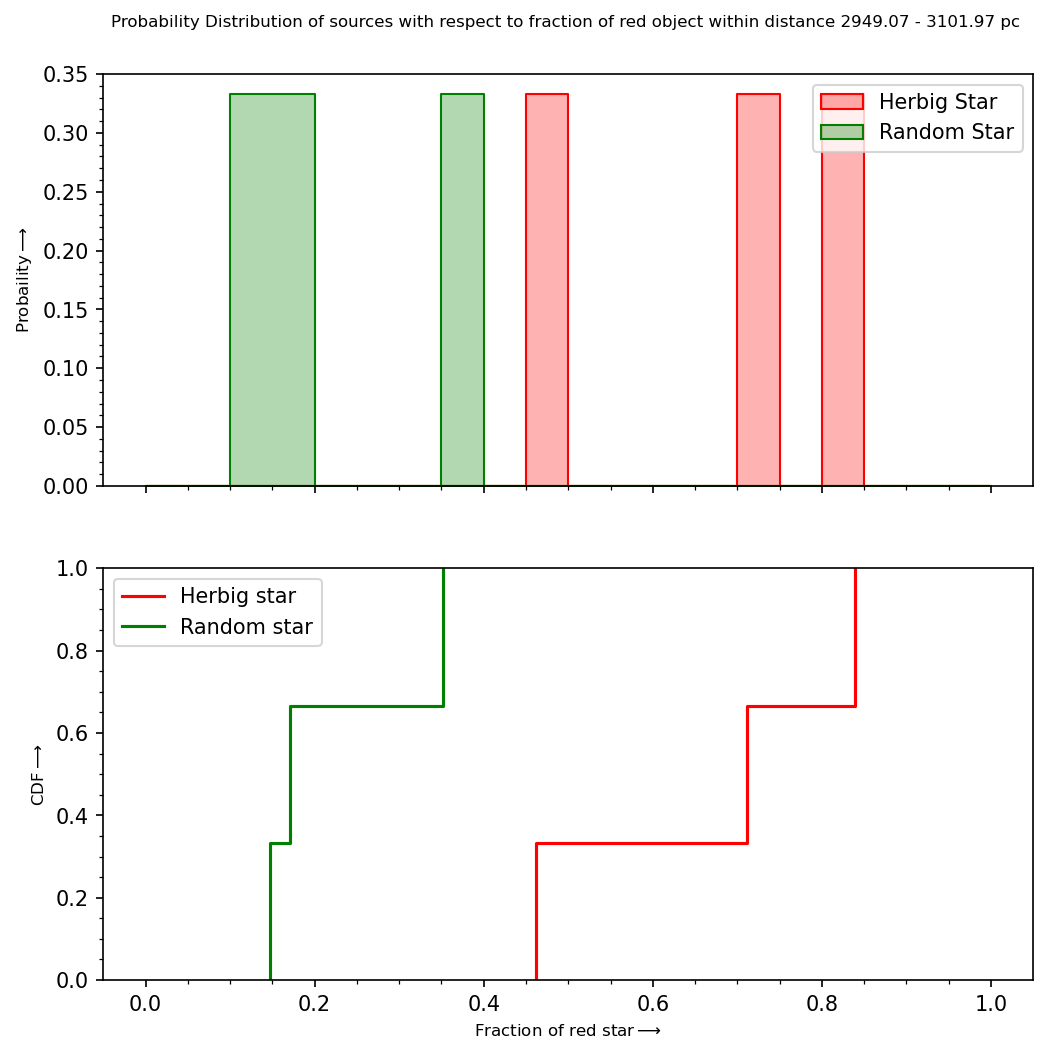

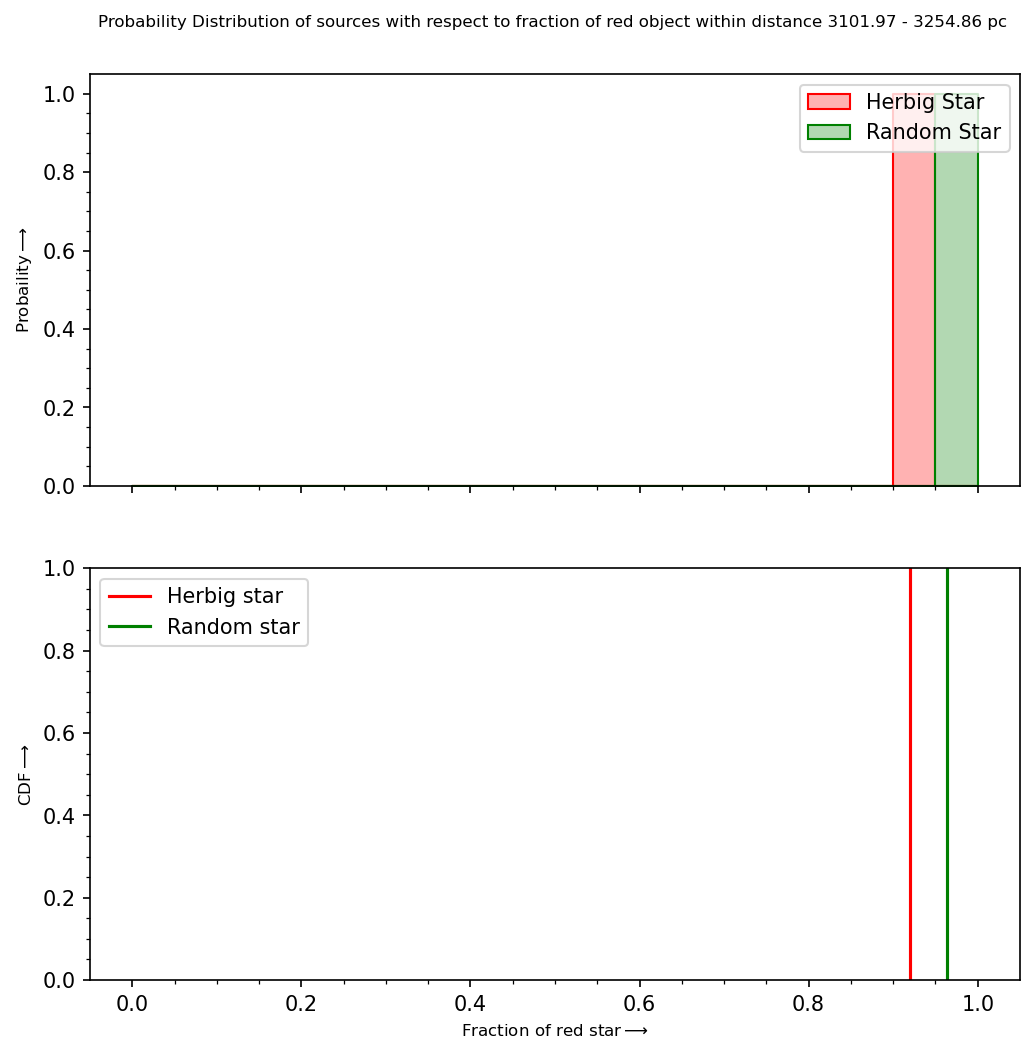

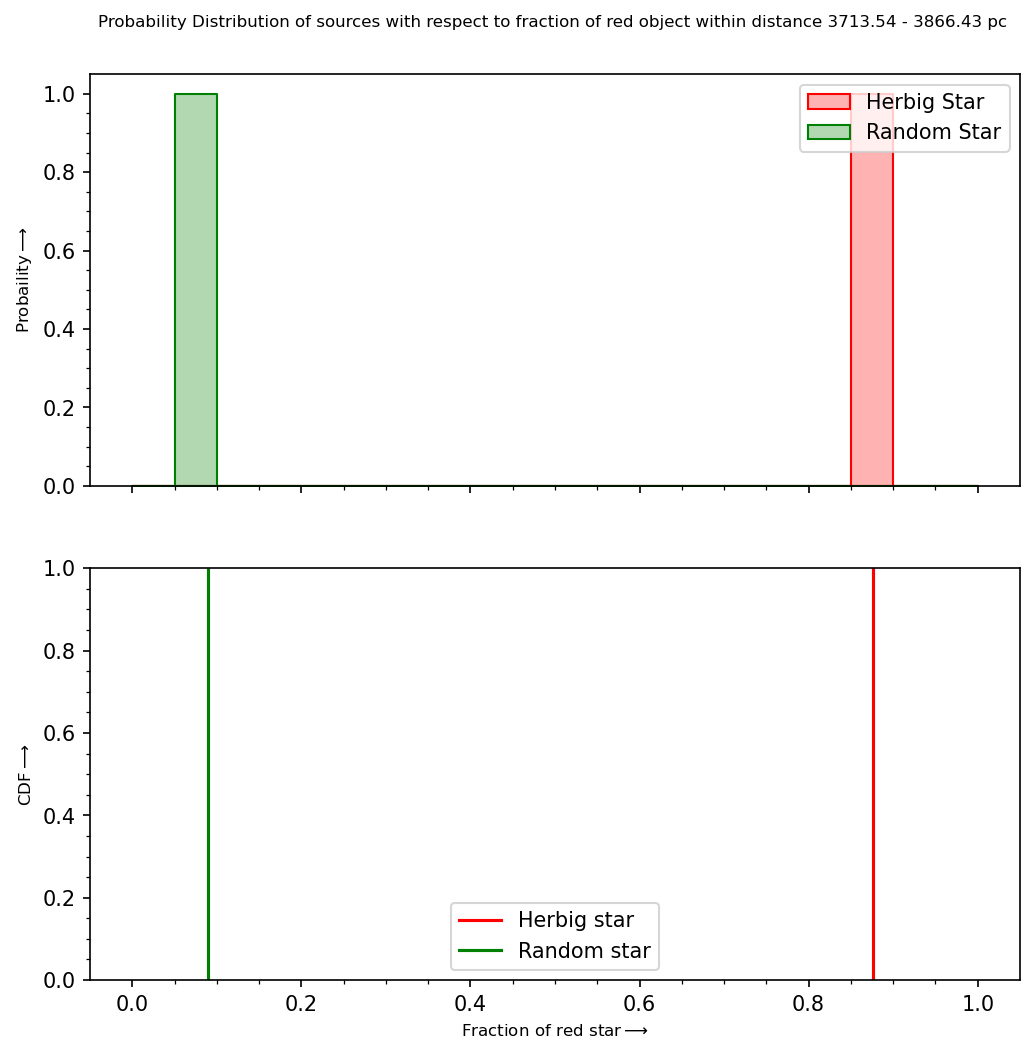

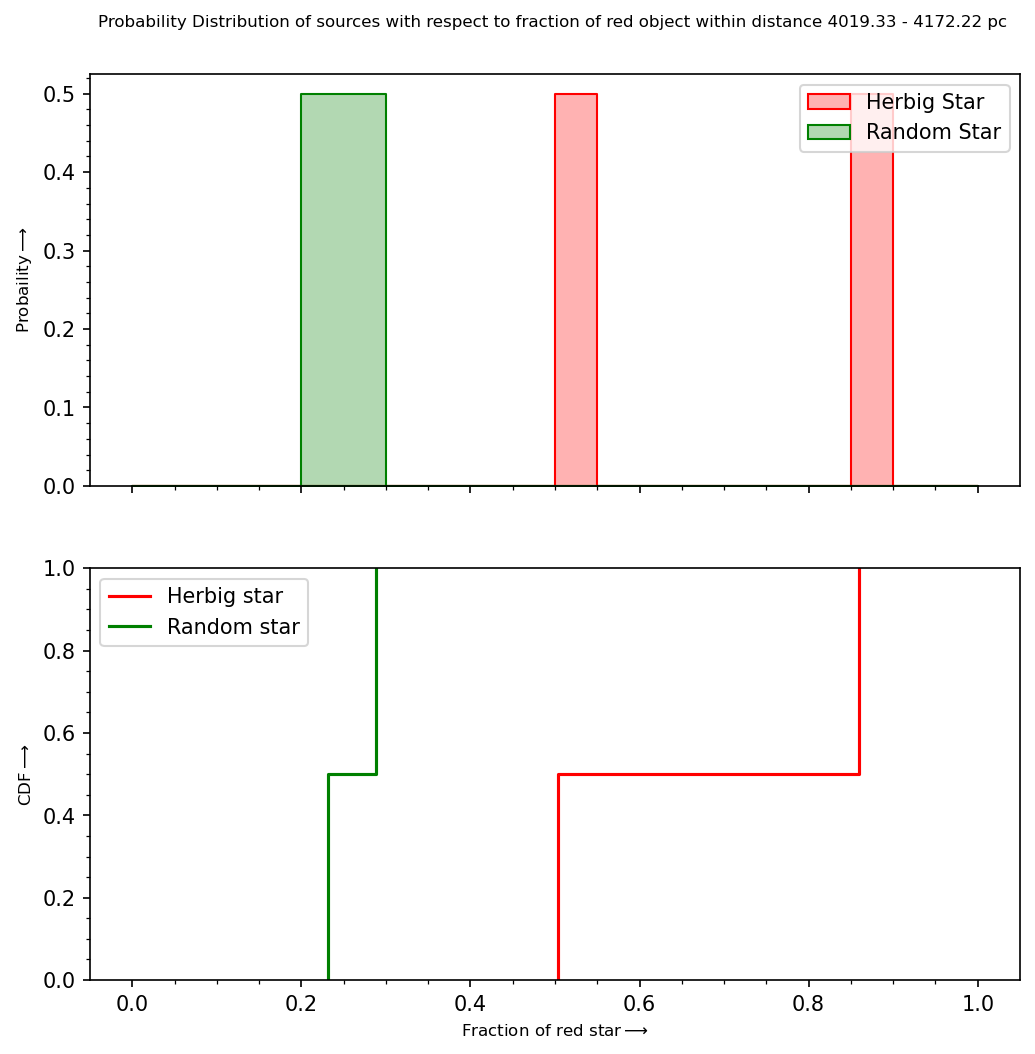

/home/priyatam/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/priyatam/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyError: 'pop from an empty set'

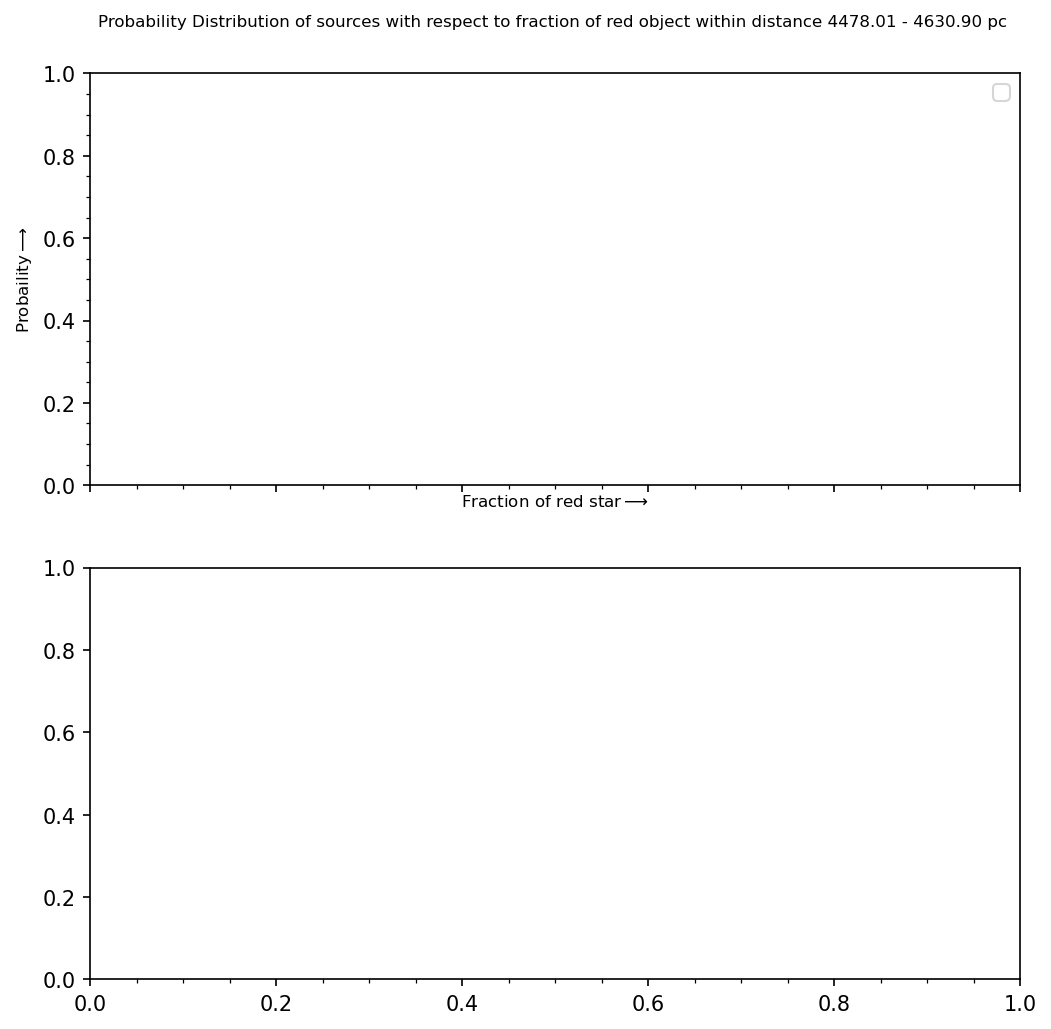

In [91]:
for i in range(len(max_num_herbig)):
    # Data plotting according to bin
    if max_num_herbig[i] != 0:

        herb_sample = herbig_star[(herbig_star["Dist"] >= herbig_bin[i]) & (herbig_star["Dist"] < herbig_bin[i+1])]
        herb_sample = herb_sample.reset_index(drop=True)
        rand_sample = random_star_sample[(random_star_sample["r_med_photogeo"] >= herbig_bin[i]) & (random_star_sample["r_med_photogeo"] < herbig_bin[i+1])]
        rand_sample = rand_sample.reset_index(drop=True)

        # --------------------------------------------------------
        result_sample = final_result(herb_sample, rand_sample, 6.0)

        #--------------------------------------------------------------
        before_frac_herb = result_sample[0]
        after_frac_herb = result_sample[1]
        before_frac_rand = result_sample[2]
        after_frac_rand = result_sample[3]

        #-------------------------------------------------------------

        # Plotting all posssible outputs

        from cProfile import label

        fig, ax = plt.subplots(nrows=2, ncols=1, dpi = 150, figsize = (8, 8), sharex=True)
        sn.histplot(before_frac_herb, bins = bins_range, ax=ax[0], stat='probability', color='red', alpha = 0.3, label='Herbig Star', element='step')
        sn.histplot(before_frac_rand, bins = bins_range, ax=ax[0], stat='probability', color = 'green',alpha = 0.3, label='Random Star', element = 'step')
        ax[0].legend()
        ax[0].set_ylabel(r"Probaility$\longrightarrow$", fontsize = 8)
        ax[0].set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
        ax[0].set_title("Probability Distribution of sources with respect to fraction of red object within distance {:4.2f} - {:4.2f} pc \n \n".format(herbig_bin[i], herbig_bin[i+1]), fontsize = 8)
        ax[0].minorticks_on()
        # ax[0].spines['bottom'].set_visible(False)
        # ax[0].spines['top'].set_visible(False)


        sn.ecdfplot(before_frac_herb, color = 'red', label='Herbig star')
        sn.ecdfplot(before_frac_rand, color = 'green', label = 'Random star')
        ax[1].legend()
        ax[1].set_ylabel(r"CDF$\longrightarrow$", fontsize = 8)
        ax[1].set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
        ax[1].minorticks_on()
        # ax[1].spines['top'].set_visible(False)
        # ax[1].spines['right'].set_visible(False)

        plt.show()




In [108]:
tauri = pd.read_csv('t tauri.csv')
tauri_star = tauri[["Name", "_RA", "_DE", "mag"]]
tauri_star = tauri_star.sort_values(by='mag')
tauri_star = tauri_star.reset_index(drop=True)
tauri_star

In [109]:
tauri_star = tauri_star.sort_values(by='mag')
tauri_star = tauri_star.reset_index(drop=True)

In [110]:
tauri_star_sample

Name        _RA       _DE   mag
0    rho Per   46.29374  38.84053   3.3
1    eta Gem   93.71957  22.50682   3.8
2    chi Cyg  297.64141  32.91415   4.0
3      R Sct  281.87073  -5.70507   4.8
4     NZ Gem  115.51341  14.20853   5.0
..       ...        ...       ...   ...
163   RR Boo  221.77413  39.31710  14.1
164   SS Oph  254.46239  -2.76178  14.4
165   RU Aql  303.18675  12.99481  14.5
166    W Dra  271.39421  65.95600  14.5
167   RV Aql  295.17942   9.93094  14.6

[168 rows x 4 columns]

<Table length=171>
     source_id              ra                 dec         ...   h_m     ks_m 
                           deg                 deg         ...   mag     mag  
       int64             float64             float64       ... float32 float32
------------------- ------------------ ------------------- ... ------- -------
4253341813008379520 281.93195227965435  -5.708996103604442 ...  11.024  10.961
4253339652727215744  281.8593305969929  -5.784945006894161 ...  12.108  11.915
4253341847368111616  281.9441484552571   -5.70877958249849 ...  13.227  12.972
4253341301994670208   281.904385204675  -5.739918324425834 ...  12.376  12.074
4253341851737280000 281.94869981185883  -5.705918630633329 ...  13.431  13.091
4253341130195930112 281.92095270218164   -5.74514094833468 ...  10.235   9.926
4253341508153049600 281.94056337922325   -5.72890784773973 ...    12.7   12.52
4253341400695176832  281.9133187828776  -5.721972904199424 ...  11.397  11.159
4253340885299096576 281.90428320006356   -5.77967960548342 ...  13.769  13.422
                ...                ...                 ... ...     ...     ...
4253354393056708352 281.81146675608295  -5.673078280004873 ...  12.595  12.321
4253353735837869824   281.915603029008  -5.675919244990927 ...  13.214  12.939
4253354869709527168 281.88374517219154    -5.6304920014198 ...  11.575  11.249
4253354908452786944 281.83735826415483 -5.6479559534256705 ...  12.502  12.324
4253354319953431936 281.85046028945686  -5.670267298215981 ...  12.356  12.082
4253352984307176704 281.87283462183876 -5.7421861241329735 ...  12.095  11.872
4253353705862293120  281.9403381909457  -5.675774401996391 ...   9.384   9.045
4253354461776195584  281.8003028968532  -5.678091282953747 ...  11.922   11.71
4253353465343634944  281.8506599605857  -5.703209956075247 ...   6.609   6.147
4253353912020231808   281.888443220667  -5.670235263235309 ...   9.701   9.373

### $\textbf{ Including distance variation of search radius}$

#### defing a function to get the corresponding search radius for a distance star

Assuming "Orion Nebula" as base distance = 412 pc and radius = 12 ly = 3.679 pc, this leads to angular size = 30.7 arcminute.

Our search radius = 6.0 arcminute

In [ ]:
def get_arc_min(dist_star_pc):
    theta_ini = 6.0 # In arcminute
    dist_ini = 412   # In parsec
    theta_star = (dist_ini * theta_ini)/dist_star_pc

    return theta_star       # it returns parallax in arcminute

In [ ]:
def final_result_orion(herbig_star_list, random_star_list):
    


    num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
    num_red_star_her = []   # For red object around Herbig Ae/Be star
    num_tot_star_rand = []  # For toatal star around random star
    num_red_star_rand = []  # For red objec around the Random Star

    # After  distance filter

    after_num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
    after_num_red_star_her = []   # For red object around Herbig Ae/Be star
    after_num_tot_star_rand = []  # For toatal star around random star
    after_num_red_star_rand = []  # For red objec around the Random Star
    


    for i in range(herbig_star_list.shape[0]):
        herbig_radius = get_arc_min(herbig_star_list["Dist"][i])

        herbig_star = get_gaia_result(1000, herbig_star_list.loc[i][1], herbig_star_list.loc[i][2], herbig_radius/60.0)
        # Filtering out stars on the basis of parallax error
        herbig_star = herbig_star[herbig_star["parallax_error"] < 0.3]
        her_mg = herbig_star["mv"]
        her_gk = herbig_star["phot_g_mean_mag"] - herbig_star["ks_m"]

        # Considering only those sources which lies within the 2*sigma distance error of the main source.

        sigma_herb = (herbig_star_list["e_Dist"][i] + herbig_star_list["E_Dist"][i])/2
        y1 = herbig_star_list["Dist"][i] - 2 *sigma_herb
        y2 = herbig_star_list["Dist"][i] + 2 *sigma_herb

        after_herbig = herbig_star#[herbig_star["dist_frac"] < 0.2]
        after_herbig = after_herbig[(after_herbig["r_med_photogeo"] > y1) & (after_herbig["r_med_photogeo"] < y2)]
        her_mg_af = after_herbig["mv"]
        her_gk_af = after_herbig["phot_g_mean_mag"] - after_herbig["ks_m"]


        
        #-----------------------------------------------------------------------------
        random_radius = get_arc_min(random_star_list["r_med_photogeo"][i])
        rand_star = get_gaia_result(1000, random_star_list.loc[i][1], random_star_list.loc[i][2], random_radius/60.0)
        rand_star = rand_star[rand_star["parallax_error"] < 0.3]
        rand_mg = rand_star["mv"]
        rand_gk = rand_star["phot_g_mean_mag"] - rand_star["ks_m"]

        # -----------------------------------------
        sigma_star = (random_star_list["r_hi_photogeo"][i] - random_star_list["r_lo_photogeo"][i])/2
        x1 = random_star_list["r_med_photogeo"][i] - 2 *sigma_star
        x2 = random_star_list["r_med_photogeo"][i] + 2 *sigma_star
        after_star = rand_star#[rand_star["dist_frac"] < 0.2]
        after_star = after_star[(after_star["r_med_photogeo"] > x1) & (after_star["r_med_photogeo"] < x2)]
    
        rand_mg_af = after_star["mv"]
        rand_gk_af = after_star["phot_g_mean_mag"] - after_star["ks_m"]
        
        #--------------------------------------------------------------------------------

        # y_values1 = np.linspace(1, 4.5, 50)
        # y_values2 = np.linspace(4.5, 8.5, 100)
        # y_values3 = np.linspace(8.5, 14.5, 100)


        # fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 100, figsize = (8, 8))
        # ax.set_xlabel(r"$G - K$", fontsize = 9)
        # ax.set_ylabel("Absolute Magnitude (G)", fontsize = 9)
        # ax.scatter(gk_1m, df.mg, s = 1, alpha = 0.2, c = 'blue')
        # ax.scatter(her_gk, her_mg, s = 5, c = 'red', label = 'HAeBe Star')
        # ax.scatter(rand_gk, rand_mg, s = 5, c = 'black', label = 'Random Star')
        # # plotting the boundries using the eqaution of straight line
        # ax.plot(equation1(y_values1), y_values1,  color = 'orange')
        # ax.plot(equation2(y_values2), y_values2,  color = 'orange')
        # ax.plot(equation3(y_values3), y_values3, color = 'orange')
        # ax.minorticks_on()
        # # ax.grid(True)
        # ax.legend(fontsize = 8)
        # ax.set_ylim(max(df.mg)+1, min(her_mg) -1)
        # plt.show()
        """ Counting Red Object around a Herbig Ae/Be Star"""

        her_red_star = counting_fun(her_mg, her_gk)

        num_tot_star_her.append(len(her_mg))
        num_red_star_her.append(her_red_star)


        af_her_red = counting_fun(her_mg_af, her_gk_af)
        after_num_tot_star_her.append(len(her_mg_af))
        after_num_red_star_her.append(af_her_red)


        """ Counting Red Object around a Random Star"""
        
        rand_red_star = counting_fun(rand_mg, rand_gk)
        num_tot_star_rand.append(len(rand_mg))
        num_red_star_rand.append(rand_red_star)


        af_star_red = counting_fun(rand_mg_af, rand_gk_af)
        after_num_tot_star_rand.append(len(rand_mg_af))
        after_num_red_star_rand.append(af_star_red)



    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    frac_before_herb = []
    frac_before_rand = []
    frac_after_herb = []
    frac_after_rand = []

    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_before_herb.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            frac_before_herb.append(f1)
        


        if after_num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_after_herb.append(f1)
        
        else:
            f1 = after_num_red_star_her[i]/after_num_tot_star_her[i]
            frac_after_herb.append(f1)


        # THIS IS FOR RANDOM STAR

        if num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_before_rand.append(f1)

        else:
            f1 = num_red_star_rand[i]/num_tot_star_rand[i]
            frac_before_rand.append(f1)
        


        if after_num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_after_rand.append(f1)
        
        else:
            f1 = after_num_red_star_rand[i]/after_num_tot_star_rand[i]
            frac_after_rand.append(f1)

    
    her_avg_frac_bf = np.average(frac_before_herb)
    her_avg_frac_af = np.average(frac_after_herb)

    rnd_avg_frac_bf = np.average(frac_before_rand)
    rnd_avg_frac_af = np.average(frac_after_rand)


    # fig, ax = plt.subplots(dpi = 300)
    # ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 8)
    # ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
    
    # ax.plot(random_star_list["r_med_photogeo"], frac_before_rand, '--', marker = "*", linewidth = 0.8, markersize = 5, label = "Random before", alpha = 0.6)
    # ax.plot(random_star_list["r_med_photogeo"], frac_after_rand, "-.", marker = "^", linewidth = 0.8, markersize = 5, label = "Random after", alpha = 0.6)
    # ax.hlines(y=rnd_avg_frac_bf, xmin=500, xmax= 1000, color = 'orange')
    # ax.hlines(y=rnd_avg_frac_af, xmin=500, xmax= 1000, color='yellow')



    # ax.plot(herbig_star_list["Dist"], frac_before_herb, marker = "D", linewidth = 0.8, markersize = 4, label = "Herbig before", alpha = 0.5)
    # ax.plot(herbig_star_list["Dist"], frac_after_herb, marker = "o", linewidth = 0.8, markersize = 5, label = "Herbig after", alpha = 0.5)
    # ax.hlines(y=her_avg_frac_bf, xmin=500, xmax= 1000, color = 'red')
    # ax.hlines(y=her_avg_frac_af, xmin=500, xmax= 1000, color='green')
    # ax.legend(fontsize = 6)
    # # ax.set_xscale("log")
    # ax.minorticks_on()
    # ax.set_title("""Plot of fraction of red star vs distance.\n Comparison in between before and after applying the "error in distance" filter \n Serach radius = {} arcminute""".format(rad_arcmin), fontsize = 8)
    # plt.show()


    return frac_before_herb, frac_after_herb, frac_before_rand, frac_after_rand

    

In [ ]:
groot = final_result_orion(herbig_star, random_star_sample)

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize = (9, 5))
ax.plot(herbig_star["Dist"], groot[0], linestyle = ' ', marker = "o", color = 'green', label = 'Herbig before')
#ax.plot(herbig_star["Dist"], groot[1], linestyle = 'dotted', marker = "s", color = 'purple', label = 'Herbig after')


ax.plot(random_star_sample["r_med_photogeo"], groot[2], linestyle = ' ', marker = "D",markersize = 5, color = 'red', label = 'Random before')
#ax.plot(random_star_sample["r_med_photogeo"], groot[3], linestyle = '-.', marker = "*", color = 'blue', label = 'Random after')

ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 8)
ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
ax.hlines(np.average(groot[0]), xmin=0, xmax=5000, color = 'green')
ax.hlines(np.average(groot[2]), xmin=0, xmax=5000, color = 'red')
ax.legend(fontsize = 6)
ax.minorticks_on()
plt.show()

 19%|█▉        | 1941/10000 [00:00<00:00, 9672.73it/s]

0
1
1267650600228229401496703205376
515377520732011331036461129765621272702107522001
1606938044258990275541962092341162602522202993782792835301376
7888609052210118054117285652827862296732064351090230047702789306640625
653318623500070906096690267158057820537143710472954871543071966369497141477376
3234476509624757991344647769100216810857203198904625400933895331391691459636928060001
2037035976334486086268445688409378161051468393665936250636140449354381299763336706183397376
265613988875874769338781322035779626829233452653394495974574961739092490901302182994384699044001
10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
137806123398222701841183371720896367762643312000384664331464775521549852095523076769401159497458526446001
828179745220145502584084235957368498016122811853894435464201864103254919330121223037770283296858019385573376
247933511096597253351107288473486513623877446787494114981218909940615869983797556015828566293998218019217159400

 29%|██▉       | 2909/10000 [00:00<00:00, 8659.31it/s]

1472634359979174454667892570244283380488812577575794878618245495300506078937195312640557556522735466622012990958122125367697112745383093692266372607636413100562652386209143762071354292632824272110485742234055073736739635986365702774587844998264326084597517793178576381110985191085990187308937447532174262972001388094765072440922001
1548002720260886765856149316210295308871505485616260461669080280796123674948755048022185330070814055940320169037976292614887876959152057240095965946006765770084877373498511951937245856073080756173858186662327143502476473503537965119757134626224836712566835346693599756181735348339505105807886683407462546839288035037772410704101376
1627187860677212852232359827183147793758059172391505549163803811541969652185570952085607143211356521086197394699220747307962388817451300162751406422917940270810758681846703513353769074133664349174908418784174525631473665364967342533782604814328216221419146582796166764073590072095673057990007637219065372846671380102634429931640625
1710

 52%|█████▏    | 5199/10000 [00:00<00:00, 10123.41it/s]


47998420301056027880875444469318434871888250418141289220482541208209288868813399136156334371030735498793693325590007772126097901255830642875225228975046269143532529197476070634771395195585567527950678433094425325766750487790452395297412173021708284051738934760754944702537546625024327019972714725769247364560702292886565014350659525728689858424493524046053376
49257324026212731141784256824527030954815154072356840474920781698586583513925312565250846607644393270560540227633833883229031677227467986236242921456236265352980619854359405190930188854278558989402340546913698476906897276762194488708048527352499719918541962564423874650048996801796751860588543861629465849585781367952689143939303848599813259300837573137364001
505489075707029783857565249315108548267806418262705035336166476399696111663971185247351122568991009347696344906484422592738043624425105717924397226327195870030251507202407624113602704963131231202698043448208097433846412275538365800091675586318798975403967200245876907485805767441

 77%|███████▋  | 7716/10000 [00:00<00:00, 11124.13it/s]

62512141037386344637220882625964337186393634639646517987053732227249107113678859208561359400977216985324053703274167001809341377509770761720785478048181390789746528097459409829481899057272199901510803255437113223068497419479005028375902184287407158350432582563749614192502253813760000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
63515444302532045472933628320506430844067043026144037418090309854218237097852651821410451648713103624456074168362224022348374704713302761951023647339163950811251713971533986354433980780089581040984630605154881010631385684157155335828226383843520220934866686582877690042948921881702123991211490751024746761665494987221150662776157474533226955370427297492550312867392518439771108001
6453468673643252038202000026334060305140582680678851507261371383267955447346971906118861310306284321724711470055159021063180220710190462461411749012035626792230318683643386591861325886514118026909612787136824644232566134819780558683155422

100%|██████████| 10000/10000 [00:00<00:00, 10604.03it/s]

539497809324818476776511447191453582576365867160146826325961604002505768913475834720731493766720545305234315770902891824650046403451120666142964140068220619914631780109557684645842990176308562948943703142148965832918977759250031201037112285642160607218443359031498609030285080691851172549227194289843422600640818936026082030857308920808846939404250064290757966316927424122250478983456789549285376
545482526257675707786587064441019546357208039642614580913354987172925387554252771124316656996274374323730350280328319652436950405800330525431251257643035734317640770509959400160811116062305425097895217215634257458213385956436009642737341628435754823170955323570275473117708805453115260424457418770906753123002642047695451517829079216981588922977226431402543449511455264655523933470249176025390625
55153296123130890017978436829597960651392831772369693869639025686015500517903842365888029448160575155139551220883072351365315119117986885735375923787843865163201479632731849568114617179227391610743485284195